In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import yaml
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
import pacc
import random
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rc('legend',fontsize=18)

## Load Data

In [2]:
s_wlwl = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_wlwl = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/wlwl.yml"), Loader=yaml.FullLoader)

s_gcgc = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_gcgc = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/gcgc.yml"), Loader=yaml.FullLoader)

s_3x2 = sacc.Sacc.load_fits("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_3x2 = yaml.load(open("/home/jaimerzp/Documents/UCL/3x2_analytical/data/CosmoDC2/gcgc_gcwl_wlwl.yml"), Loader=yaml.FullLoader)

In [3]:
cle_3x2  = pacc.ClsEnsemble(s_3x2, y_3x2,   label="CosmoDC2 3x2  - data")
cle_wlwl = pacc.ClsEnsemble(s_wlwl, y_wlwl, label="CosmoDC2 wlwl - data")
cle_gcgc = pacc.ClsEnsemble(s_gcgc, y_gcgc, label="CosmoDC2 gcgc - data")

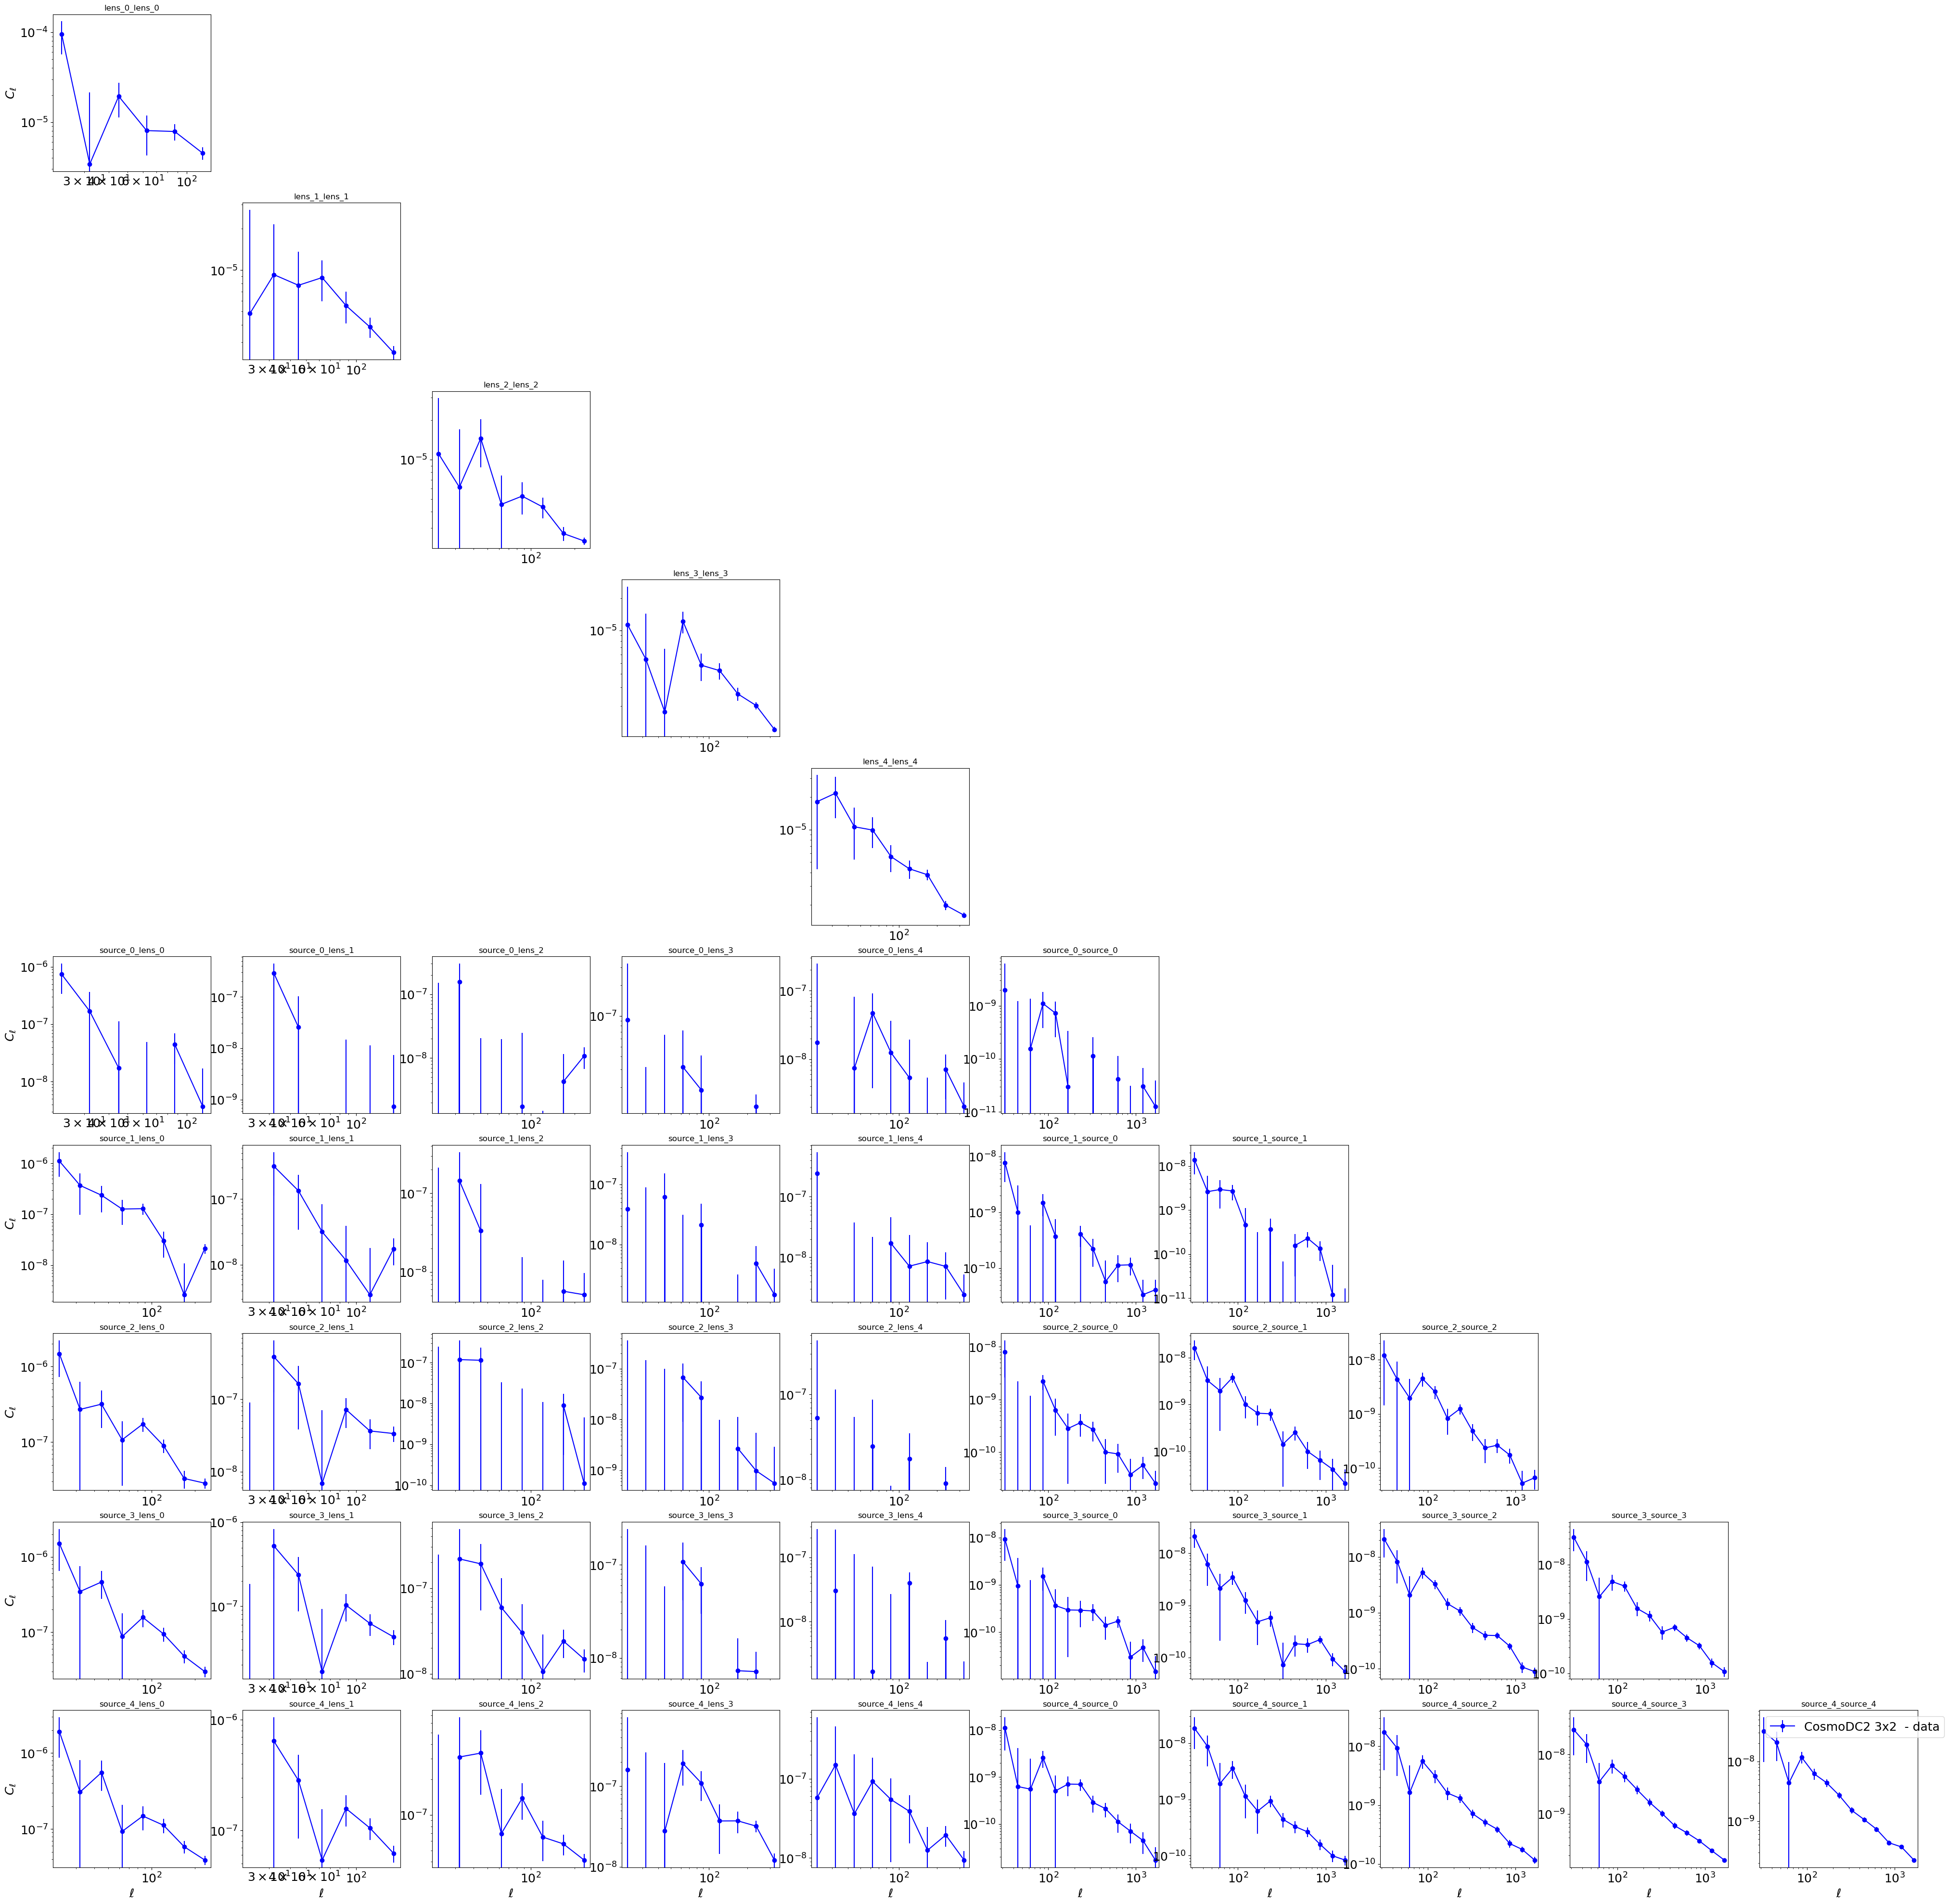

In [4]:
pacc.plot_cls([[cle_3x2]], cle_3x2.pairs);

In [5]:
wzdz_path = "./data/CosmoDC2/image_wzdz_bpz_priors/wzdz_prior.npz"
wzdz_prior = np.load(wzdz_path)
prior_samples = []
for i in range(10_000):
    prior_sample = np.random.multivariate_normal(wzdz_prior["mean"],
                                                wzdz_prior["cov"])
    prior_samples.append(prior_sample)
prior_samples = np.array(prior_samples).T
prior_wzdz_chain = {}
prior_wzdz_chain["dzs_lens[1]"] = prior_samples[0]
prior_wzdz_chain["wzs_lens[1]"] = prior_samples[1]
prior_wzdz_chain["dzs_lens[2]"] = prior_samples[2]
prior_wzdz_chain["wzs_lens[2]"] = prior_samples[3]
prior_wzdz_chain["dzs_lens[3]"] = prior_samples[4]
prior_wzdz_chain["wzs_lens[3]"] = prior_samples[5]
prior_wzdz_chain["dzs_lens[4]"] = prior_samples[6]
prior_wzdz_chain["wzs_lens[4]"] = prior_samples[7]
prior_wzdz_chain["dzs_lens[5]"] = prior_samples[8]
prior_wzdz_chain["wzs_lens[5]"] = prior_samples[9]
prior_wzdz_chain["dzs_source[1]"] = prior_samples[10]
prior_wzdz_chain["wzs_source[1]"] = prior_samples[11]
prior_wzdz_chain["dzs_source[2]"] = prior_samples[12]
prior_wzdz_chain["wzs_source[2]"] = prior_samples[13]
prior_wzdz_chain["dzs_source[3]"] = prior_samples[14]
prior_wzdz_chain["wzs_source[3]"] = prior_samples[15]
prior_wzdz_chain["dzs_source[4]"] = prior_samples[16]
prior_wzdz_chain["wzs_source[4]"] = prior_samples[17]
prior_wzdz_chain["dzs_source[5]"] = prior_samples[18]
prior_wzdz_chain["wzs_source[5]"] = prior_samples[19]


In [6]:
dz_path = "./data/CosmoDC2/image_dz_bpz_priors/dz_prior.npz"
dz_prior = np.load(dz_path)
prior_samples = []
for i in range(10_000):
    prior_sample = np.random.multivariate_normal(dz_prior["mean"],
                                                dz_prior["cov"])
    prior_samples.append(prior_sample)
prior_samples = np.array(prior_samples).T
prior_dz_chain = {}
prior_dz_chain["dzs_lens[1]"] = prior_samples[0]
prior_dz_chain["dzs_lens[2]"] = prior_samples[1]
prior_dz_chain["dzs_lens[3]"] = prior_samples[2]
prior_dz_chain["dzs_lens[4]"] = prior_samples[3]
prior_dz_chain["dzs_lens[5]"] = prior_samples[4]
prior_dz_chain["dzs_source[1]"] = prior_samples[5]
prior_dz_chain["dzs_source[2]"] = prior_samples[6]
prior_dz_chain["dzs_source[3]"] = prior_samples[7]
prior_dz_chain["dzs_source[4]"] = prior_samples[8]
prior_dz_chain["dzs_source[5]"] = prior_samples[9]


## Load Chains

In [7]:
def add_chains(paths, start=1, stop=100):
    chains = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"chain_{}.csv".format(i))) & (i<=stop):
            chain = pd.read_csv(path+"chain_{}.csv".format(i))
            chains.append(chain)
            i += 1
    return pd.concat(chains)

In [8]:
path_real_gcgc_nomarg = "chains/nomarg/CosmoDC2_gcgc_bp_nomarg_TAP_0.65_init_ϵ_0.01/"
path_real_wlwl_nomarg = "chains/nomarg/CosmoDC2_wlwl_nomarg_TAP_0.65_init_ϵ_0.03/"
path_real_3x2_nomarg = "chains/nomarg/CosmoDC2_3x2_bp_nomarg_TAP_0.65_init_ϵ_0.03/"

path_real_nuisance_gcgc_nomarg = "chains/nomarg/CosmoDC2_gcgc_nuisances_bp_nomarg_TAP_0.65_init_ϵ_0.01/"
path_real_nuisance_3x2_nomarg = "chains/nomarg/CosmoDC2_3x2_nuisances_bp_nomarg_TAP_0.65_init_ϵ_0.03/"

path_3x2_nomarg = "fake_chains/nomarg/CosmoDC2_3x2_bp_nomarg_TAP_0.65_init_ϵ_0.03/"
path_gcgc_nomarg = "fake_chains/nomarg/CosmoDC2_gcgc_bp_nomarg_TAP_0.65_init_ϵ_0.01/"
path_wlwl_nomarg = "fake_chains/nomarg/CosmoDC2_wlwl_nomarg_TAP_0.65/"

path_3x2_nuisance_nomarg = "nuisance_fake_chains/nomarg/CosmoDC2_3x2_nomarg_TAP_0.65_init_ϵ_0.03/"
path_gcgc_nuisance_nomarg = "nuisance_fake_chains/nomarg/CosmoDC2_gcgc_nomarg_TAP_0.65_init_ϵ_0.01/"
path_wlwl_nuisance_nomarg = "nuisance_fake_chains/nomarg/CosmoDC2_wlwl_nomarg_TAP_0.65_init_ϵ_0.03/"

path_3x2_wzdz_ana = "fake_chains/analytical/CosmoDC2_3x2_bp_wzdz_ana_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_wzdz_ana= "nuisance_fake_chains/analytical/CosmoDC2_3x2_wzdz_ana_TAP_0.65_init_ϵ_0.03/"
path_gcgc_wzdz_ana = "fake_chains/analytical/CosmoDC2_gcgc_bp_wzdz_ana_TAP_0.65_init_ϵ_0.01/"
path_gcgc_nuisance_wzdz_ana = "nuisance_fake_chains/analytical/CosmoDC2_gcgc_wzdz_ana_TAP_0.65_init_ϵ_0.01/"
path_wlwl_wzdz_ana = "fake_chains/analytical/CosmoDC2_wlwl_dzwz_ana_TAP_0.65/"
path_wlwl_nuisance_wzdz_ana = "nuisance_fake_chains/analytical/CosmoDC2_wlwl_wzdz_ana_TAP_0.65_init_ϵ_0.03/"

path_3x2_dz_ana = "fake_chains/analytical/CosmoDC2_3x2_bp_dz_ana_TAP_0.65_init_ϵ_0.03/"
path_3x2_nuisance_dz_ana = "nuisance_fake_chains/analytical/CosmoDC2_3x2_dz_ana_TAP_0.65_init_ϵ_0.03/"
path_gcgc_dz_ana = "fake_chains/analytical/CosmoDC2_gcgc_bp_dz_ana_TAP_0.65_init_ϵ_0.01/"
path_gcgc_nuisance_dz_ana = "nuisance_fake_chains/analytical/CosmoDC2_gcgc_dz_ana_TAP_0.65_init_ϵ_0.01/"
path_wlwl_dz_ana = "fake_chains/analytical/CosmoDC2_wlwl_dz_ana_TAP_0.65/"
path_wlwl_nuisance_dz_ana = "nuisance_fake_chains/analytical/CosmoDC2_wlwl_wzdz_ana_TAP_0.65_init_ϵ_0.03/"

path_gcgc_wzdz_num = "fake_chains/numerical/CosmoDC2_gcgc_bp_wzdz_num_TAP_0.65_init_ϵ_0.01/"
path_gcgc_nuisance_wzdz_num = "nuisance_fake_chains/numerical/CosmoDC2_gcgc_wzdz_num_TAP_0.65_init_ϵ_0.01/"
path_wlwl_wzdz_num = "fake_chains/numerical/CosmoDC2_wlwl_wzdz_num_TAP_0.65/"

path_gcgc_dz_num = "fake_chains/numerical/CosmoDC2_gcgc_bp_dz_num_TAP_0.65_init_ϵ_0.01/"
path_gcgc_nuisance_dz_num = "nuisance_fake_chains/numerical/CosmoDC2_gcgc_dz_num_TAP_0.65_init_ϵ_0.01/"
path_wlwl_dz_num = "fake_chains/numerical/CosmoDC2_wlwl_dz_num_TAP_0.65/"
path_wlwl_nuisance_dz_num = "nuisance_fake_chains/numerical/CosmoDC2_wlwl_dz_num_TAP_0.65_init_ϵ_0.03/"
path_3x2_dz_num = "fake_chains/numerical/CosmoDC2_3x2_bp_dz_num_TAP_0.65_init_ϵ_0.03/"

In [9]:
chain_real_gcgc_nomarg = add_chains([path_real_gcgc_nomarg])
chain_real_wlwl_nomarg = add_chains([path_real_wlwl_nomarg])
chain_real_3x2_nomarg = add_chains([path_real_3x2_nomarg])

chain_real_nuisance_gcgc_nomarg = add_chains([path_real_nuisance_gcgc_nomarg])
chain_real_nuisance_3x2_nomarg = add_chains([path_real_nuisance_3x2_nomarg])

chain_3x2_nomarg = add_chains([path_3x2_nomarg])
chain_gcgc_nomarg = add_chains([path_gcgc_nomarg])
chain_wlwl_nomarg = add_chains([path_wlwl_nomarg])

chain_3x2_nuisance_nomarg = add_chains([path_3x2_nuisance_nomarg])
chain_gcgc_nuisance_nomarg = add_chains([path_gcgc_nuisance_nomarg])
chain_wlwl_nuisance_nomarg = add_chains([path_wlwl_nuisance_nomarg])

chain_3x2_wzdz_ana = add_chains([path_3x2_wzdz_ana])
chain_3x2_nuisance_wzdz_ana = add_chains([path_3x2_nuisance_wzdz_ana])
chain_gcgc_wzdz_ana = add_chains([path_gcgc_wzdz_ana])
chain_gcgc_nuisance_wzdz_ana = add_chains([path_gcgc_nuisance_wzdz_ana])
chain_wlwl_wzdz_ana = add_chains([path_wlwl_wzdz_ana])
chain_wlwl_nuisance_wzdz_ana = add_chains([path_wlwl_nuisance_wzdz_ana])

chain_3x2_dz_ana = add_chains([path_3x2_dz_ana])
chain_3x2_nuisance_dz_ana = add_chains([path_3x2_nuisance_dz_ana])
chain_gcgc_dz_ana = add_chains([path_gcgc_dz_ana])
chain_gcgc_nuisance_dz_ana = add_chains([path_gcgc_nuisance_dz_ana])
chain_wlwl_dz_ana = add_chains([path_wlwl_dz_ana])
chain_wlwl_nuisance_dz_ana = add_chains([path_wlwl_nuisance_dz_ana])

chain_gcgc_wzdz_num = add_chains([path_gcgc_wzdz_num])
chain_gcgc_nuisance_wzdz_num = add_chains([path_gcgc_nuisance_wzdz_num])
chain_wlwl_wzdz_num = add_chains([path_wlwl_wzdz_num])

chain_gcgc_dz_num = add_chains([path_gcgc_dz_num])
chain_gcgc_nuisance_dz_num = add_chains([path_gcgc_nuisance_dz_num])
chain_wlwl_dz_num = add_chains([path_wlwl_dz_num])
chain_wlwl_nuisance_dz_num = add_chains([path_wlwl_nuisance_dz_num])
#chain_3x2_dz_num = add_chains([path_3x2_dz_num])

## Trace plots

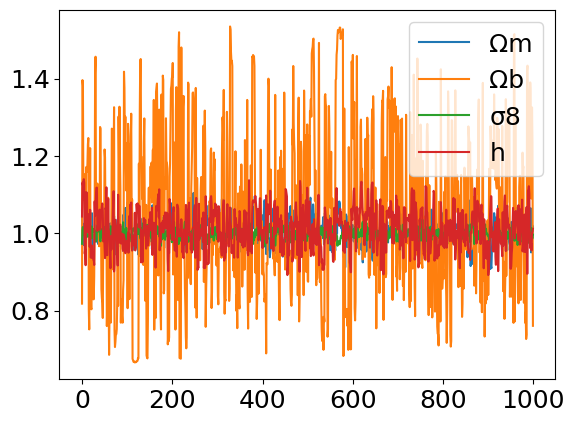

In [10]:
plt.plot(np.array(chain_3x2_nomarg["Ωm"])/0.2734714358876248, label="Ωm")
plt.plot(np.array(chain_3x2_nomarg["Ωb"])/0.042170616570847225, label="Ωb")
plt.plot(np.array(chain_3x2_nomarg["σ8"])/0.7790071910238021, label="σ8")
plt.plot(np.array(chain_3x2_nomarg["h"])/0.7189925511925751, label="h")
plt.legend()

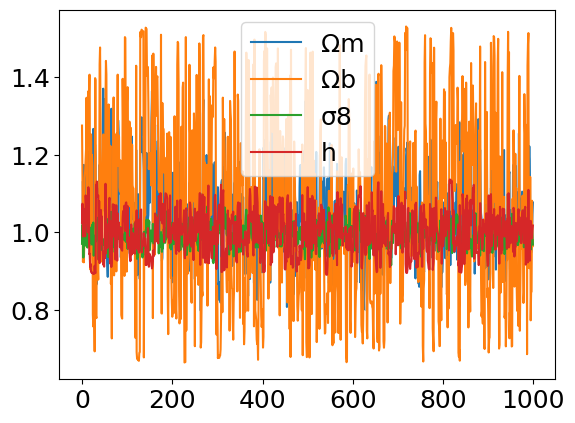

In [11]:
plt.plot(np.array(chain_gcgc_nomarg["Ωm"])/0.2734714358876248, label="Ωm")
plt.plot(np.array(chain_gcgc_nomarg["Ωb"])/0.042170616570847225, label="Ωb")
plt.plot(np.array(chain_gcgc_nomarg["σ8"])/0.7790071910238021, label="σ8")
plt.plot(np.array(chain_gcgc_nomarg["h"])/0.7189925511925751, label="h")
#plt.plot(np.array(chain_gcgc_nomarg["ns"])/np.mean(np.array(chain_gcgc_nomarg["ns"])), label="ns")
plt.legend()

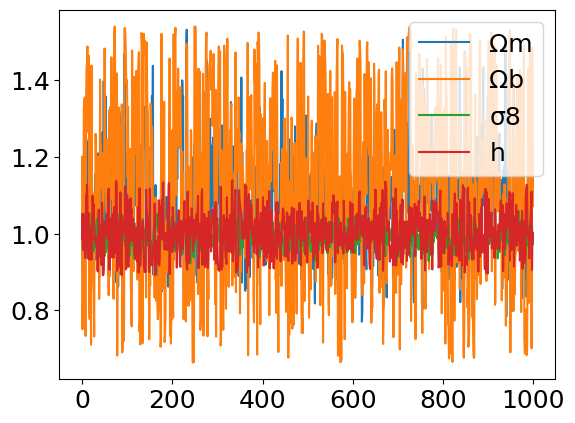

In [12]:
plt.plot(np.array(chain_gcgc_dz_num["Ωm"])/0.2734714358876248, label="Ωm")
plt.plot(np.array(chain_gcgc_dz_num["Ωb"])/0.042170616570847225, label="Ωb")
plt.plot(np.array(chain_gcgc_dz_num["σ8"])/0.7790071910238021, label="σ8")
plt.plot(np.array(chain_gcgc_dz_num["h"])/0.7189925511925751, label="h")
plt.legend()

In [13]:
chain_gcgc_nuisance_dz_num["dzs_lens[1]"]

0      0.123704
1     -0.055835
2      0.118830
3     -0.110887
4     -0.085520
         ...   
495   -0.008177
496    0.029611
497   -0.029473
498   -0.036130
499    0.010949
Name: dzs_lens[1], Length: 500, dtype: float64

## Posteriors

In [14]:
labels_dict = {'h': 'h',
               'Ωm': r'\Omega_m',
               'Ωb': r'\Omega_b',
               'ns': 'n_s',
               'σ8': r'\sigma_8',
               'S8': 'S_8',
               'A_IA': 'A_{IA}',
               'alpha_IA': r'\alpha_{IA}',

               'lens_1_b': r'b_{lens}^{1}',
               'lens_2_b': r'b_{lens}^{2}',
               'lens_3_b': r'b_{lens}^{3}',
               'lens_4_b': r'b_{lens}^{4}',
               'lens_5_b': r'b_{lens}^{5}',
               
               'dzs[1]': r'\Delta^{1}_{z, lens}',
               'dzs[2]': r'\Delta^{2}_{z, lens}',
               'dzs[3]': r'\Delta^{3}_{z, lens}',
               'dzs[4]': r'\Delta^{4}_{z, lens}',
               'dzs[5]': r'\Delta^{5}_{z, lens}',
               'dzs[6]': r'\Delta^{1}_{z, source}',
               'dzs[7]': r'\Delta^{2}_{z, source}',
               'dzs[8]': r'\Delta^{3}_{z, source}',
               'dzs[9]': r'\Delta^{4}_{z, source}',
               'dzs[10]': r'\Delta^{5}_{z, source}', 

               'wzs[1]': r'w^{1}_{z, lens}',
               'wzs[2]': r'w^{1}_{z, lens}',
               'wzs[3]': r'w^{1}_{z, lens}',
               'wzs[4]': r'w^{1}_{z, lens}',
               'wzs[5]': r'w^{1}_{z, lens}',
               'wzs[6]': r'w^{1}_{z, source}',
               'wzs[7]': r'w^{1}_{z, source}',
               'wzs[8]': r'w^{1}_{z, source}',
               'wzs[9]': r'w^{1}_{z, source}',
               'wzs[10]': r'w^{1}_{z, source}',

               'dzs_lens[1]': r'\Delta^{1}_{z, lens}',
               'dzs_lens[2]': r'\Delta^{2}_{z, lens}',
               'dzs_lens[3]': r'\Delta^{3}_{z, lens}',
               'dzs_lens[4]': r'\Delta^{4}_{z, lens}',
               'dzs_lens[5]': r'\Delta^{5}_{z, lens}',
               'dzs_source[1]': r'\Delta^{1}_{z, source}',
               'dzs_source[2]': r'\Delta^{2}_{z, source}',
               'dzs_source[3]': r'\Delta^{3}_{z, source}',
               'dzs_source[4]': r'\Delta^{4}_{z, source}',
               'dzs_source[5]': r'\Delta^{5}_{z, source}', 

               'wzs_lens[1]': r'w^{1}_{z, lens}',
               'wzs_lens[2]': r'w^{1}_{z, lens}',
               'wzs_lens[3]': r'w^{1}_{z, lens}',
               'wzs_lens[4]': r'w^{1}_{z, lens}',
               'wzs_lens[5]': r'w^{1}_{z, lens}',
               'wzs_source[1]': r'w^{1}_{z, source}',
               'wzs_source[2]': r'w^{1}_{z, source}',
               'wzs_source[3]': r'w^{1}_{z, source}',
               'wzs_source[4]': r'w^{1}_{z, source}',
               'wzs_source[5]': r'w^{1}_{z, source}',
               
               'A_IA': 'A_{IA}'}

In [15]:
def make_chain(file, label, ranges=dict({}), weight=False, labels_dict=labels_dict):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        #print(param)
        if param in labels_dict.keys():
            #print(param)
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])
    if ('σ8' in params) & ('Ωm' in params):
        #print('S8')
        names.append('S8')
        labels.append(labels_dict['S8'])
        samples.append(file['σ8']*np.sqrt(file['Ωm']/0.3))

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))
    if weight == True:
        if "log_density" in params:
            print("applying weights")
            ws = np.array(file['log_density'])
    else:
        ws = None
    print("========")

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges, weights=ws,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [16]:
samples_dz_prior = make_chain(prior_dz_chain, r"Prior - $\Delta_z$ ", labels_dict=labels_dict)
samples_wzdz_prior = make_chain(prior_wzdz_chain, r"Prior - $\Delta_z + w_z$ ", labels_dict=labels_dict)

Prior - $\Delta_z$ 
Removed no burn in
Prior - $\Delta_z + w_z$ 
Removed no burn in


In [17]:
samples_real_gcgc_nomarg = make_chain(chain_real_gcgc_nomarg, "CosmoDC2 GCGC Real - Fixed", labels_dict=labels_dict)
samples_real_wlwl_nomarg = make_chain(chain_real_wlwl_nomarg, "CosmoDC2 WLWL Real - Fixed", labels_dict=labels_dict)
samples_real_3x2_nomarg = make_chain(chain_real_3x2_nomarg, "CosmoDC2 3x2 Real - Fixed", labels_dict=labels_dict)

CosmoDC2 GCGC Real - Fixed
Removed no burn in
CosmoDC2 WLWL Real - Fixed
Removed no burn in
CosmoDC2 3x2 Real - Fixed
Removed no burn in


In [18]:
samples_real_nuisance_gcgc_nomarg = make_chain(chain_real_nuisance_gcgc_nomarg, "CosmoDC2 GCGC Real - Nuisances", labels_dict=labels_dict)
samples_real_nuisance_3x2_nomarg = make_chain(chain_real_nuisance_3x2_nomarg, "CosmoDC2 3x2 Real - Nuisances", labels_dict=labels_dict)

CosmoDC2 GCGC Real - Nuisances
Removed no burn in
CosmoDC2 3x2 Real - Nuisances
Removed no burn in


In [19]:
samples_wlwl_nomarg = make_chain(chain_wlwl_nomarg, "CosmoDC2 WLWL - Fixed")
samples_gcgc_nomarg = make_chain(chain_gcgc_nomarg, "CosmoDC2 GCGC - Fixed")
samples_3x2_nomarg  = make_chain(chain_3x2_nomarg,  "CosmoDC2 3x2 - Fixed")

CosmoDC2 WLWL - Fixed
Removed no burn in
CosmoDC2 GCGC - Fixed
Removed no burn in
CosmoDC2 3x2 - Fixed
Removed no burn in


In [20]:
samples_gcgc_nuisance_nomarg = make_chain(chain_gcgc_nuisance_nomarg, "CosmoDC2 GCGC - Fixed w/ Nuisances")
samples_3x2_nuisance_nomarg = make_chain(chain_3x2_nuisance_nomarg, "CosmoDC2 3x2 - Fixed w/ Nuisances")
samples_wlwl_nuisance_nomarg = make_chain(chain_wlwl_nuisance_nomarg, "CosmoDC2 WLWL - Fixed w/ Nuisances")

CosmoDC2 GCGC - Fixed w/ Nuisances
Removed no burn in
CosmoDC2 3x2 - Fixed w/ Nuisances
Removed no burn in
CosmoDC2 WLWL - Fixed w/ Nuisances
Removed no burn in


In [21]:
samples_wlwl_dz_ana = make_chain(chain_wlwl_dz_ana, r"CosmoDC2 WLWL - $\Delta_z$ Analytical")
samples_wlwl_nuisance_dz_ana = make_chain(chain_wlwl_nuisance_dz_ana, r"CosmoDC2 WLWL - $\Delta_z$ Analytical w/ Nuisances")
samples_gcgc_dz_ana = make_chain(chain_gcgc_dz_ana, r"CosmoDC2 GCGC - $\Delta_z$ Analytical")
samples_gcgc_nuisance_dz_ana = make_chain(chain_gcgc_nuisance_dz_ana, r"CosmoDC2 GCGC - $\Delta_z$ Analytical w/ Nuisances")
samples_3x2_dz_ana = make_chain(chain_3x2_dz_ana, r"CosmoDC2 3x2 - $\Delta_z$ Analytical")
samples_3x2_nuisance_dz_ana = make_chain(chain_3x2_nuisance_dz_ana, r"CosmoDC2 3x2 - $\Delta_z$ Analytical w/ Nuisances")

CosmoDC2 WLWL - $\Delta_z$ Analytical
Removed no burn in
CosmoDC2 WLWL - $\Delta_z$ Analytical w/ Nuisances
Removed no burn in
CosmoDC2 GCGC - $\Delta_z$ Analytical
Removed no burn in
CosmoDC2 GCGC - $\Delta_z$ Analytical w/ Nuisances
Removed no burn in
CosmoDC2 3x2 - $\Delta_z$ Analytical
Removed no burn in
CosmoDC2 3x2 - $\Delta_z$ Analytical w/ Nuisances
Removed no burn in


In [22]:
samples_wlwl_wzdz_ana = make_chain(chain_wlwl_wzdz_ana, r"CosmoDC2 WLWL - $\Delta_z + w_z$ Analytical")
samples_wlwl_nuisance_wzdz_ana = make_chain(chain_wlwl_nuisance_wzdz_ana, r"CosmoDC2 WLWL - $\Delta_z + w_z$ Analytical w/ Nuisances")
samples_gcgc_wzdz_ana = make_chain(chain_gcgc_wzdz_ana, r"CosmoDC2 GCGC - $\Delta_z + w_z$ Analytical")
samples_gcgc_nuisance_wzdz_ana = make_chain(chain_gcgc_nuisance_wzdz_ana, r"CosmoDC2 GCGC - $\Delta_z + w_z$ Analytical w/ Nuisances")
samples_3x2_wzdz_ana = make_chain(chain_3x2_wzdz_ana, r"CosmoDC2 3x2 - $\Delta_z + w_z$ Analytical")
samples_3x2_nuisance_wzdz_ana = make_chain(chain_3x2_nuisance_wzdz_ana, r"CosmoDC2 3x2 - $\Delta_z + w_z$ Analytical w/ Nuisances")

CosmoDC2 WLWL - $\Delta_z + w_z$ Analytical
Removed no burn in
CosmoDC2 WLWL - $\Delta_z + w_z$ Analytical w/ Nuisances
Removed no burn in
CosmoDC2 GCGC - $\Delta_z + w_z$ Analytical
Removed no burn in
CosmoDC2 GCGC - $\Delta_z + w_z$ Analytical w/ Nuisances
Removed no burn in
CosmoDC2 3x2 - $\Delta_z + w_z$ Analytical
Removed no burn in
CosmoDC2 3x2 - $\Delta_z + w_z$ Analytical w/ Nuisances
Removed no burn in


In [23]:
samples_wlwl_dz_num = make_chain(chain_wlwl_dz_num, r"CosmoDC2 WLWL - $\Delta_z$ Numerical")
samples_wlwl_nuisance_dz_num = make_chain(chain_wlwl_nuisance_dz_num, r"CosmoDC2 WLWL - $\Delta_z$ Numerical w/ Nuisances")
samples_gcgc_dz_num = make_chain(chain_gcgc_dz_num, r"CosmoDC2 GCGC - $\Delta_z$ Numerical")
samples_gcgc_nuisance_dz_num = make_chain(chain_gcgc_nuisance_dz_num, r"CosmoDC2 GCGC - $\Delta_z$ Numerical w/ Nuisances")

CosmoDC2 WLWL - $\Delta_z$ Numerical
Removed no burn in
CosmoDC2 WLWL - $\Delta_z$ Numerical w/ Nuisances
Removed no burn in
CosmoDC2 GCGC - $\Delta_z$ Numerical
Removed no burn in
CosmoDC2 GCGC - $\Delta_z$ Numerical w/ Nuisances
Removed no burn in


In [24]:
samples_wlwl_wzdz_num = make_chain(chain_wlwl_wzdz_num, r"CosmoDC2 WLWL - $\Delta_z + w_z$ Numerical")
samples_gcgc_wzdz_num = make_chain(chain_gcgc_wzdz_num, r"CosmoDC2 GCGC - $\Delta_z + w_z$ Numerical")
samples_gcgc_nuisance_wzdz_num = make_chain(chain_gcgc_nuisance_wzdz_num, r"CosmoDC2 GCGC - $\Delta_z + w_z$ Numerical w/ Nuisances")
samples_gcgc_nuisance_wzdz_num = make_chain(chain_gcgc_nuisance_wzdz_num, r"CosmoDC2 GCGC - $\Delta_z + w_z$ Numerical w/ Nuisances")

CosmoDC2 WLWL - $\Delta_z + w_z$ Numerical
Removed no burn in
CosmoDC2 GCGC - $\Delta_z + w_z$ Numerical
Removed no burn in
CosmoDC2 GCGC - $\Delta_z + w_z$ Numerical w/ Nuisances
Removed no burn in
CosmoDC2 GCGC - $\Delta_z + w_z$ Numerical w/ Nuisances
Removed no burn in


In [25]:
prat_markers = {'h': 0.7189925511925751,
               'Ωm': 0.2734714358876248,
               'Ωb': 0.042170616570847225,
               'ns': 0.9965136823002241,
               'σ8': 0.7790071910238021,
               'lens_1_b':0.879118,
               'lens_2_b':1.05894, 
               'lens_3_b':1.22145, 
               'lens_4_b':1.35065, 
               'lens_5_b':1.58909,
               'A_IA':0.25179439}
prat_markers['S8'] = prat_markers['σ8']*np.sqrt(prat_markers['Ωm']/0.3)

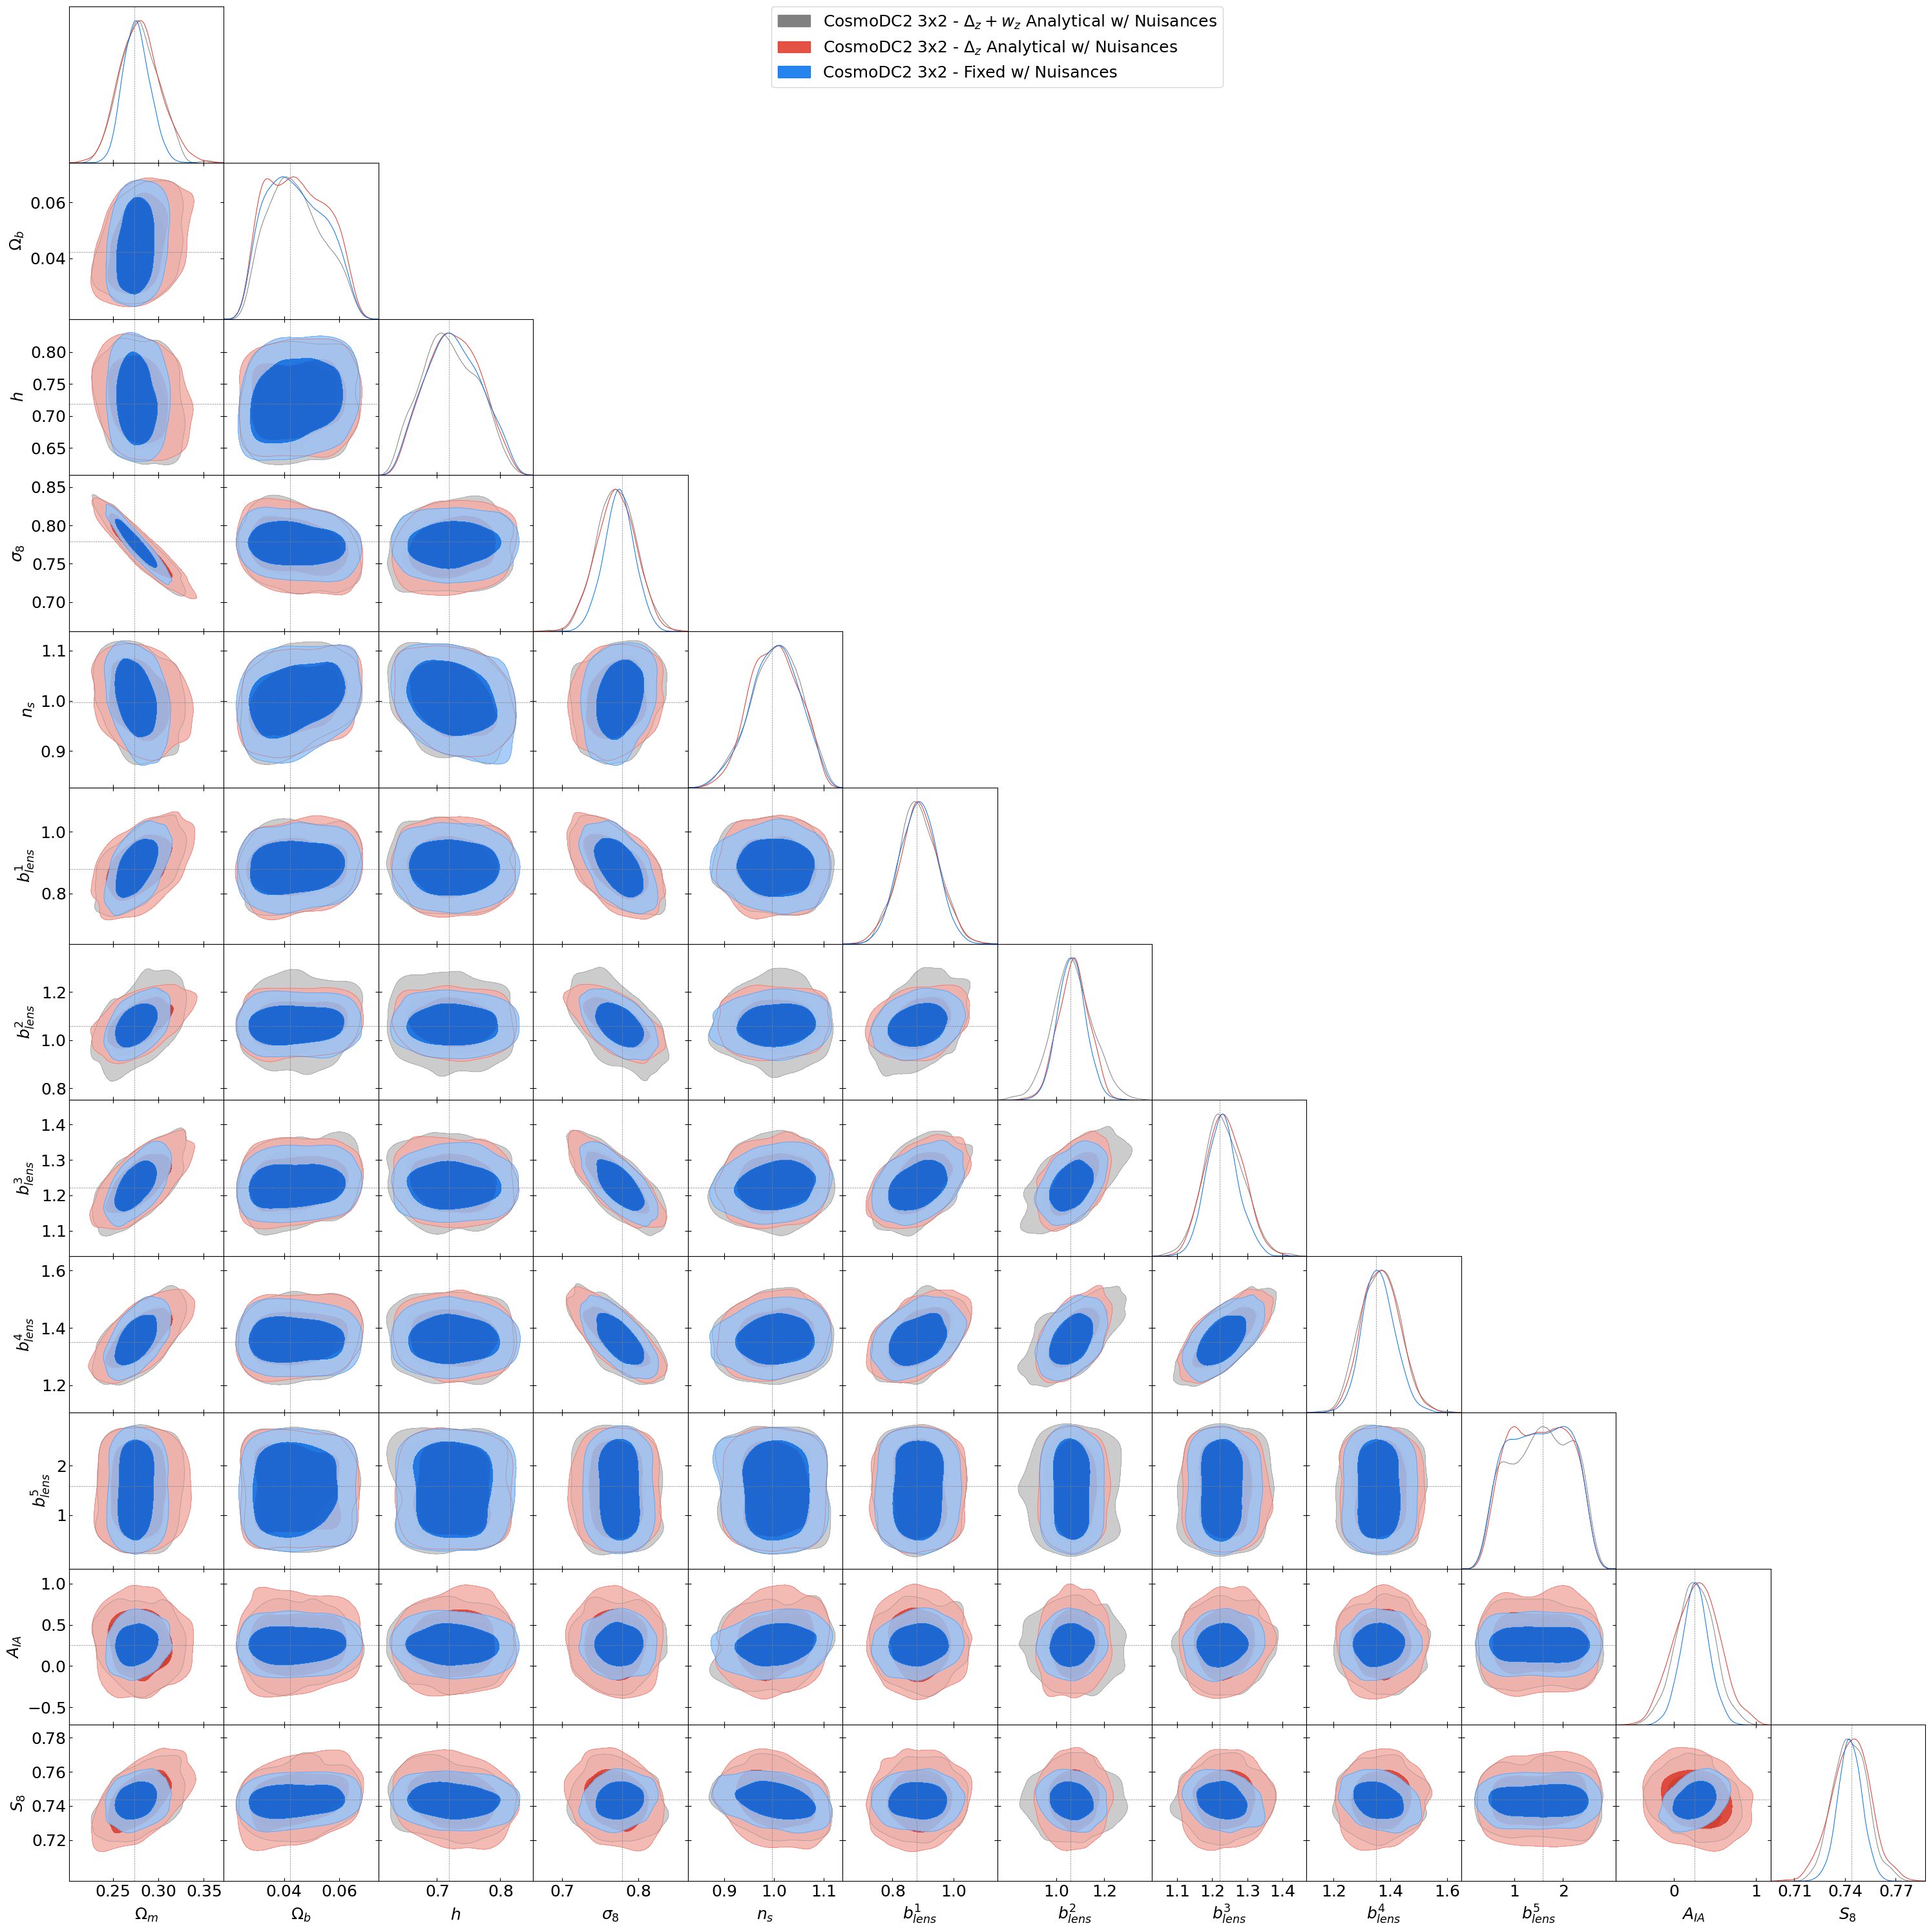

In [26]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([
                 samples_3x2_nuisance_wzdz_ana,
                 samples_3x2_nuisance_dz_ana,
                 samples_3x2_nuisance_nomarg,
                 ],
                 #['Ωm', 'Ωb', 'h', 'ns', 'σ8', 'S8'],
                 markers=prat_markers,
                 filled=True)

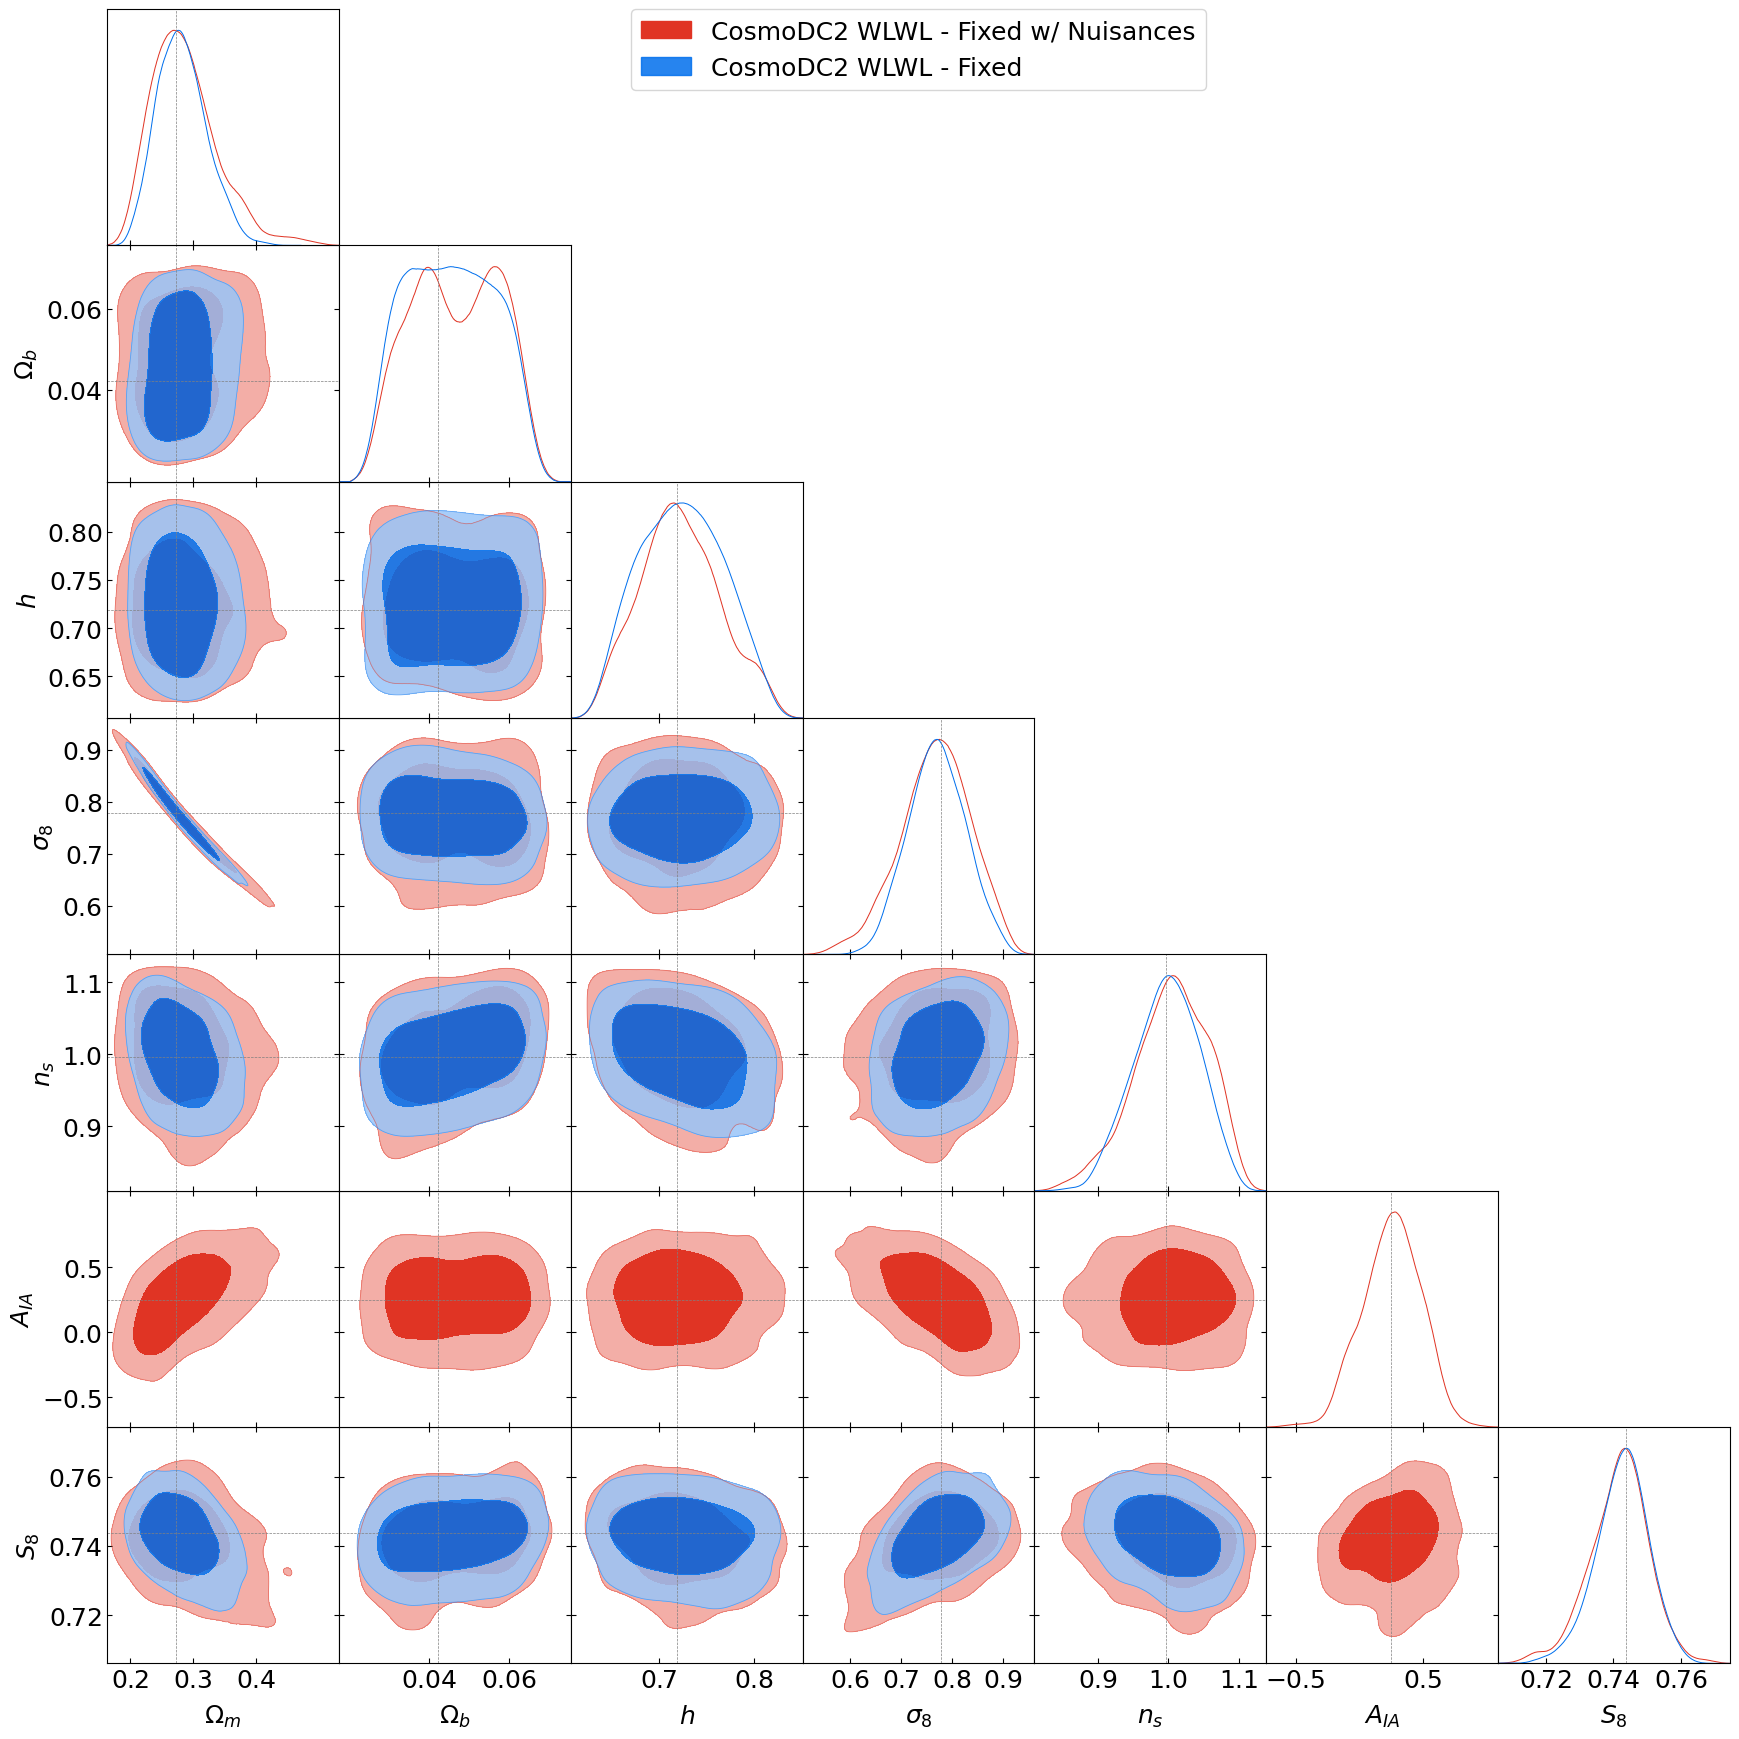

In [27]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([samples_wlwl_nuisance_nomarg,
                 samples_wlwl_nomarg],
                 #['Ωm', 'Ωb', 'h', 'ns', 'σ8', 'S8'],
                 markers=prat_markers,
                 filled=True)

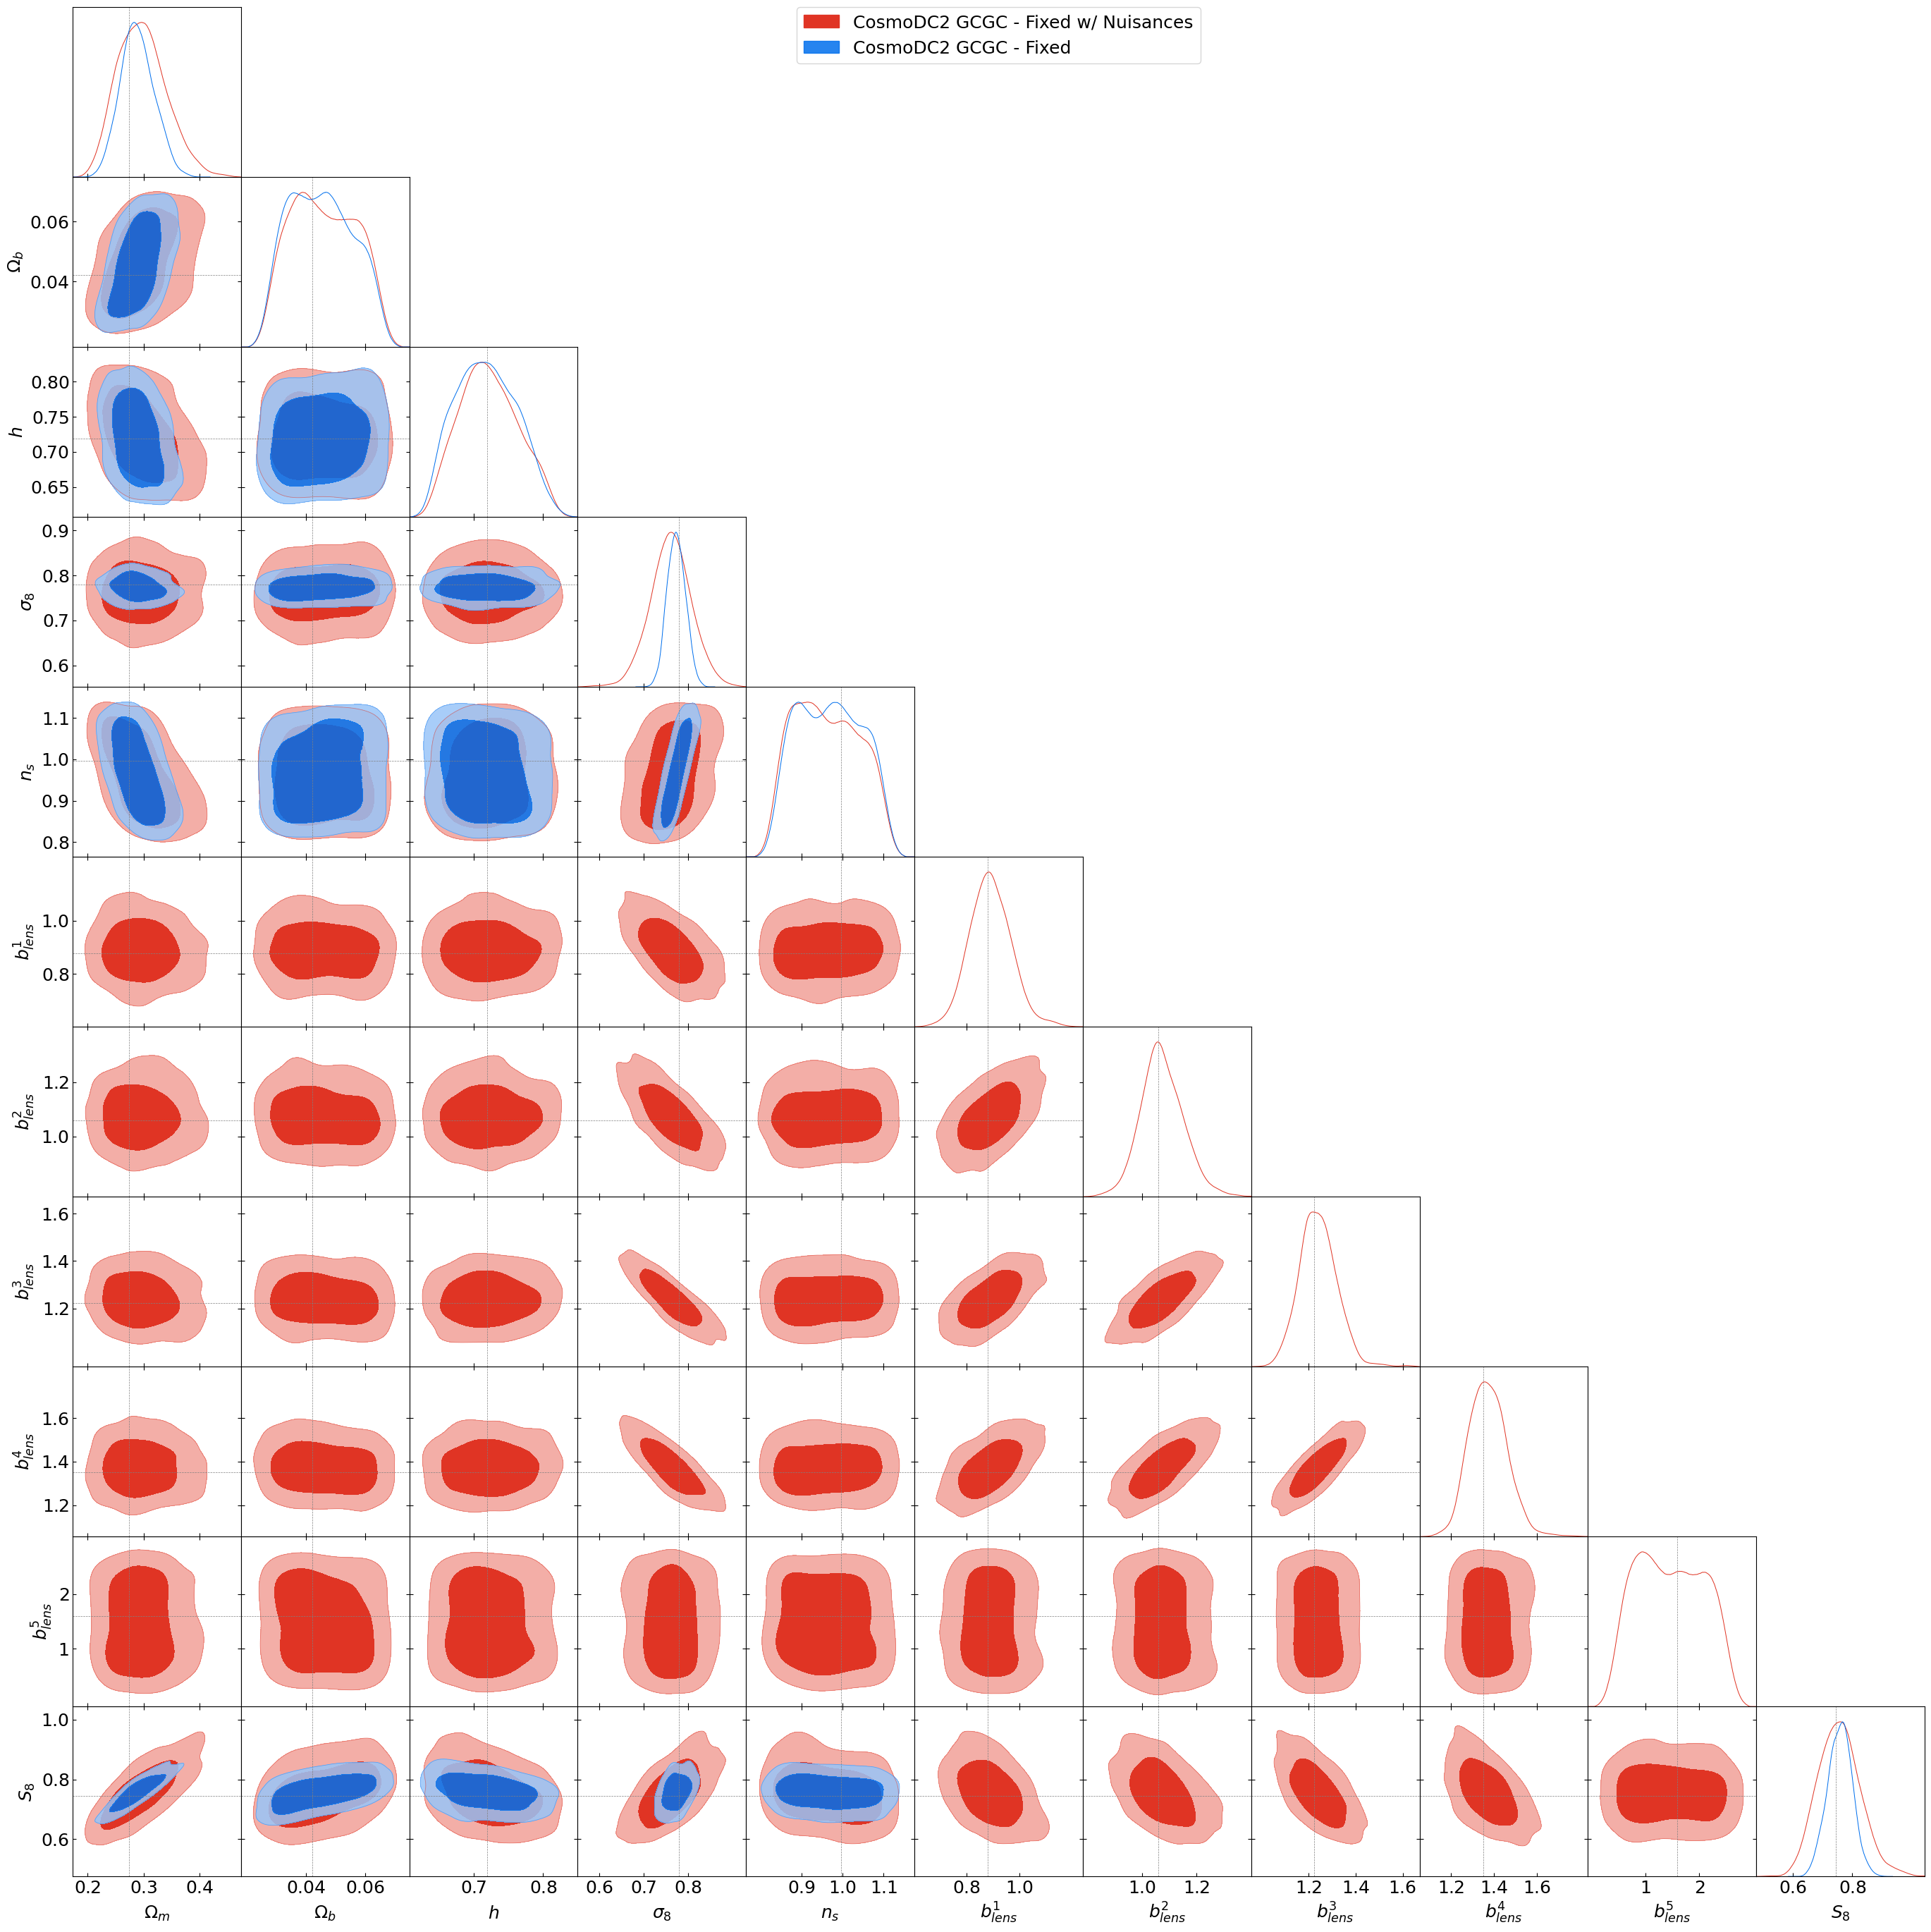

In [28]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([samples_gcgc_nuisance_nomarg,
                 samples_gcgc_nomarg],
                 #['Ωm', 'Ωb', 'h', 'ns', 'σ8', 'S8'],
                 markers=prat_markers,
                 filled=True)

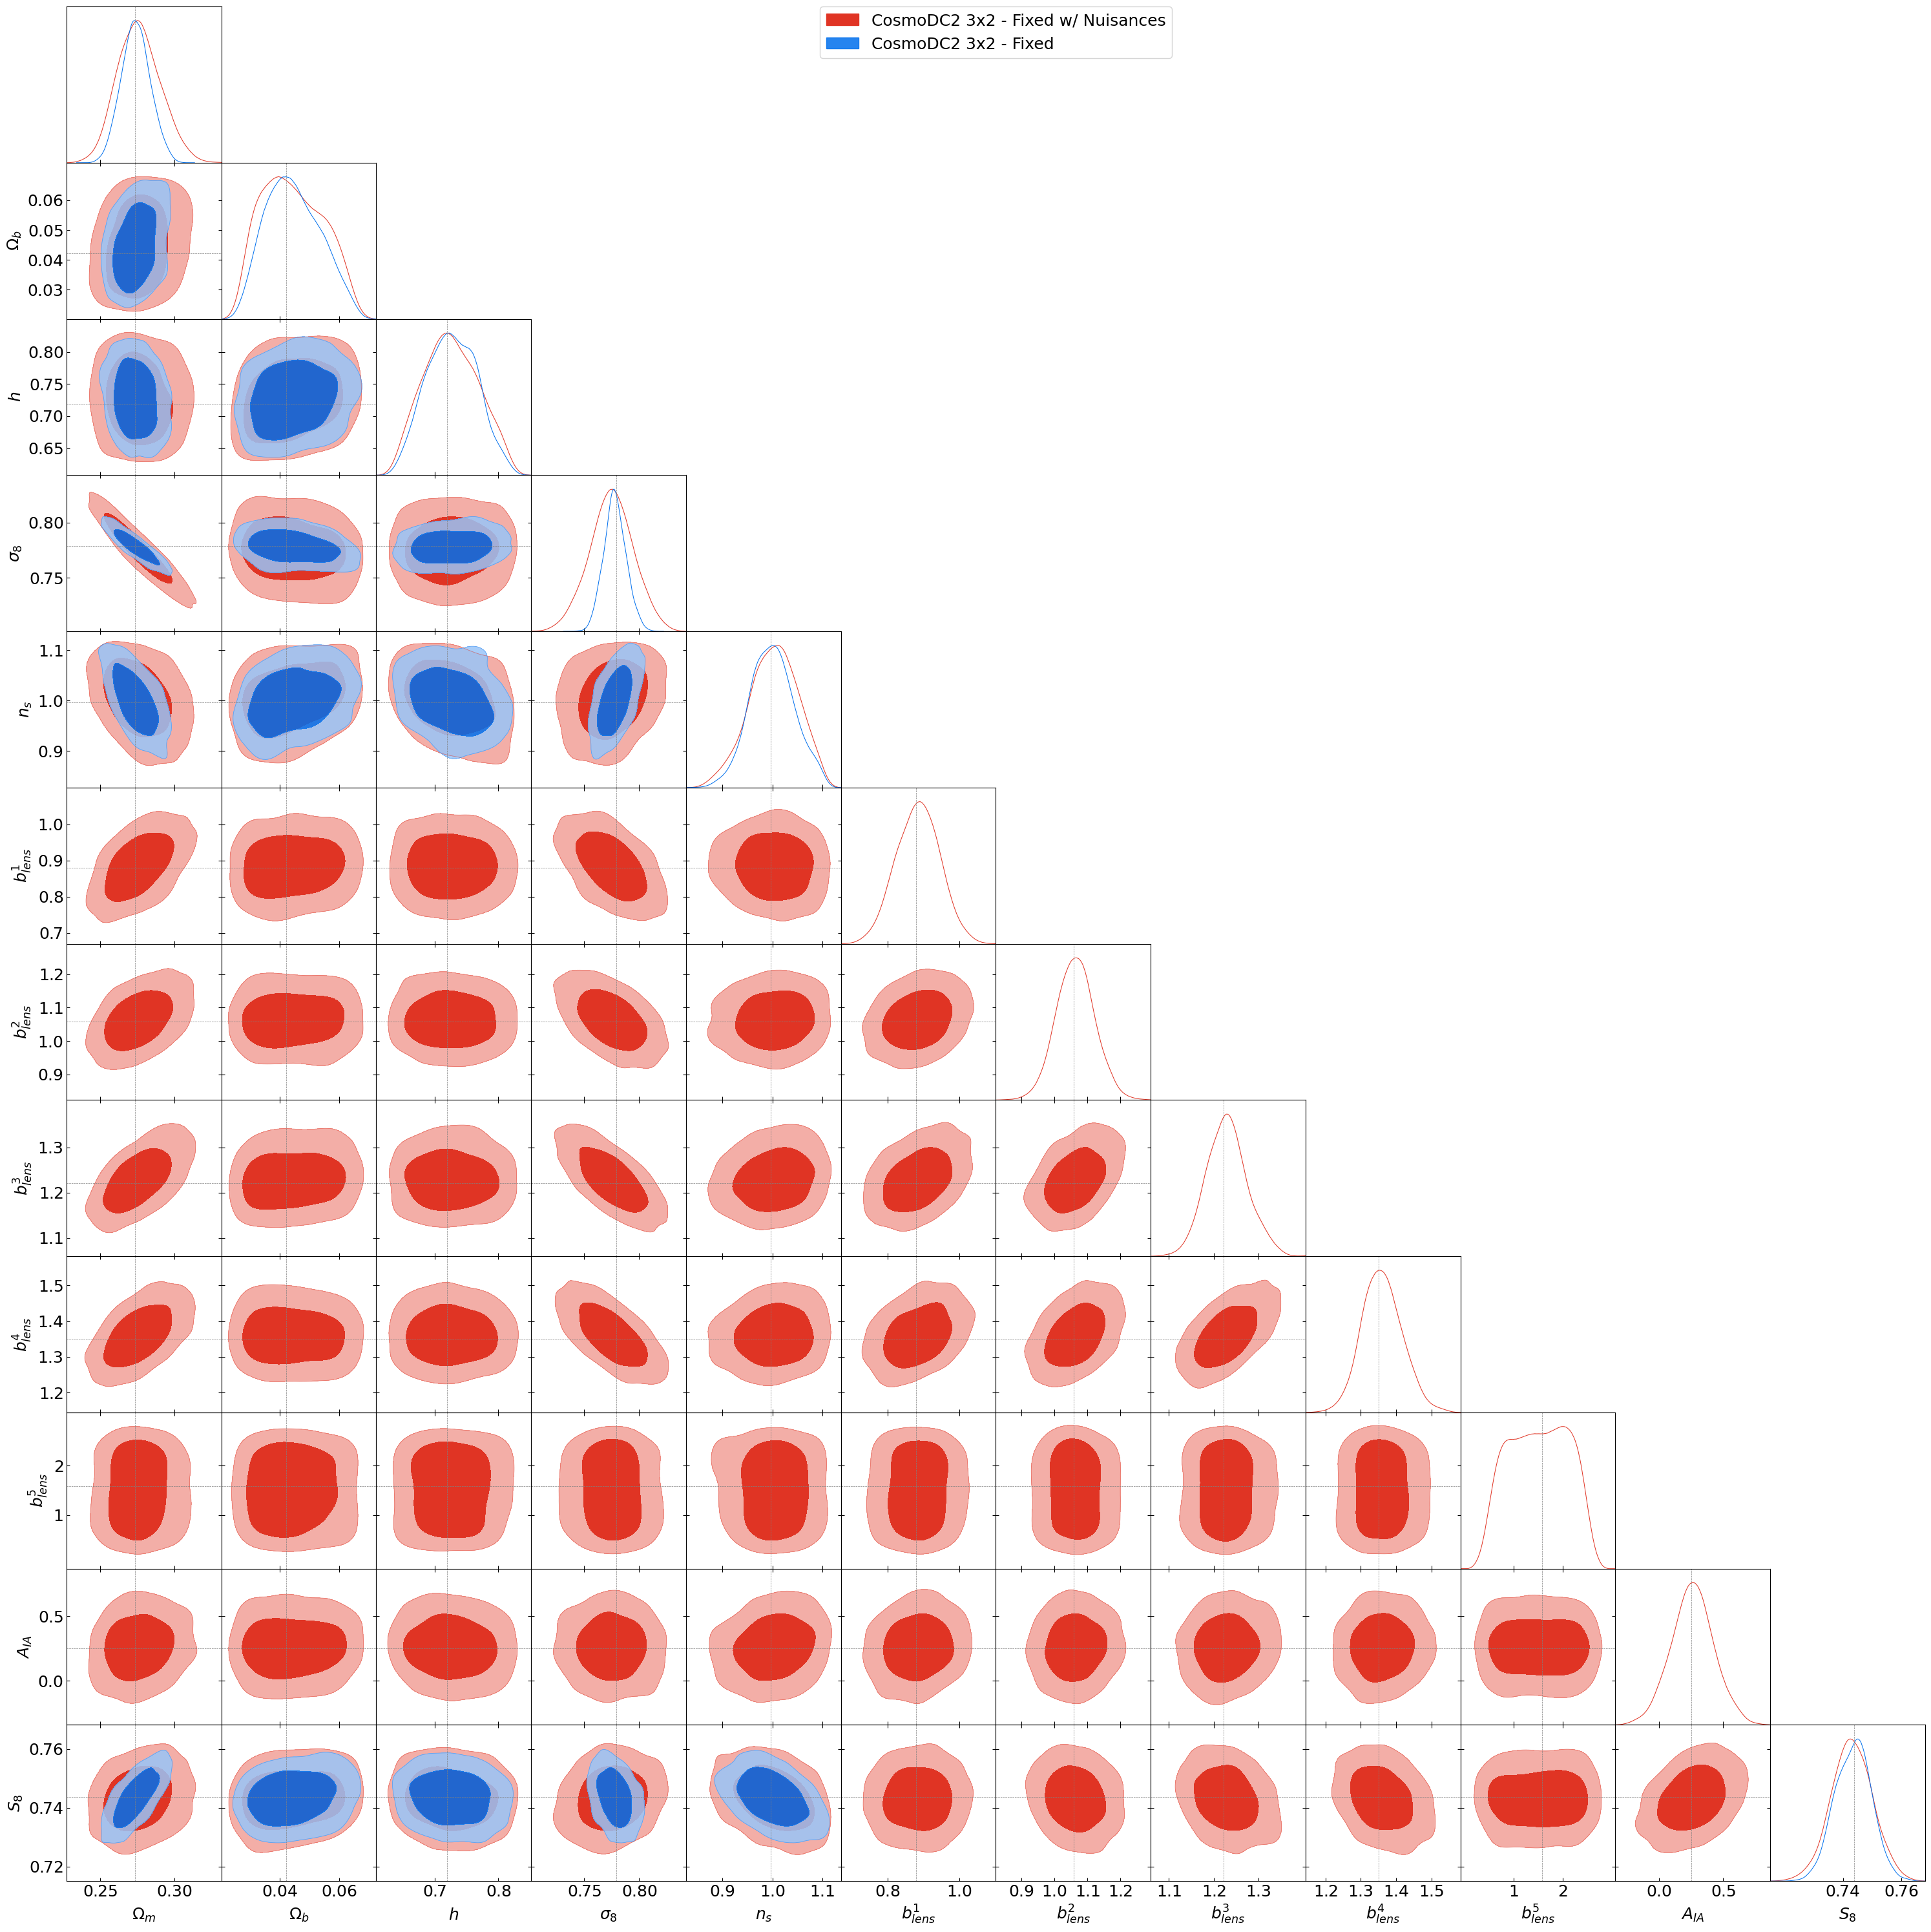

In [29]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([
                samples_3x2_nuisance_nomarg,
                 samples_3x2_nomarg],
                 #['Ωm', 'Ωb', 'h', 'ns', 'σ8', 'S8'],
                 markers=prat_markers,
                 filled=True)

In [30]:
#g = plots.getSubplotPlotter(subplot_size=2.5)
#g.settings.axes_fontsize = 20
#g.settings.legend_fontsize = 20
#g.settings.axes_labelsize = 20
#g.triangle_plot([samples_real_gcgc_nomarg,
#                 samples_real_wlwl_nomarg,
#                 samples_real_3x2_nomarg],
#                 ['Ωm', 'Ωb', 'h', 'ns', 'σ8', 'S8'],
#                 markers=prat_markers,
#                 filled=True)

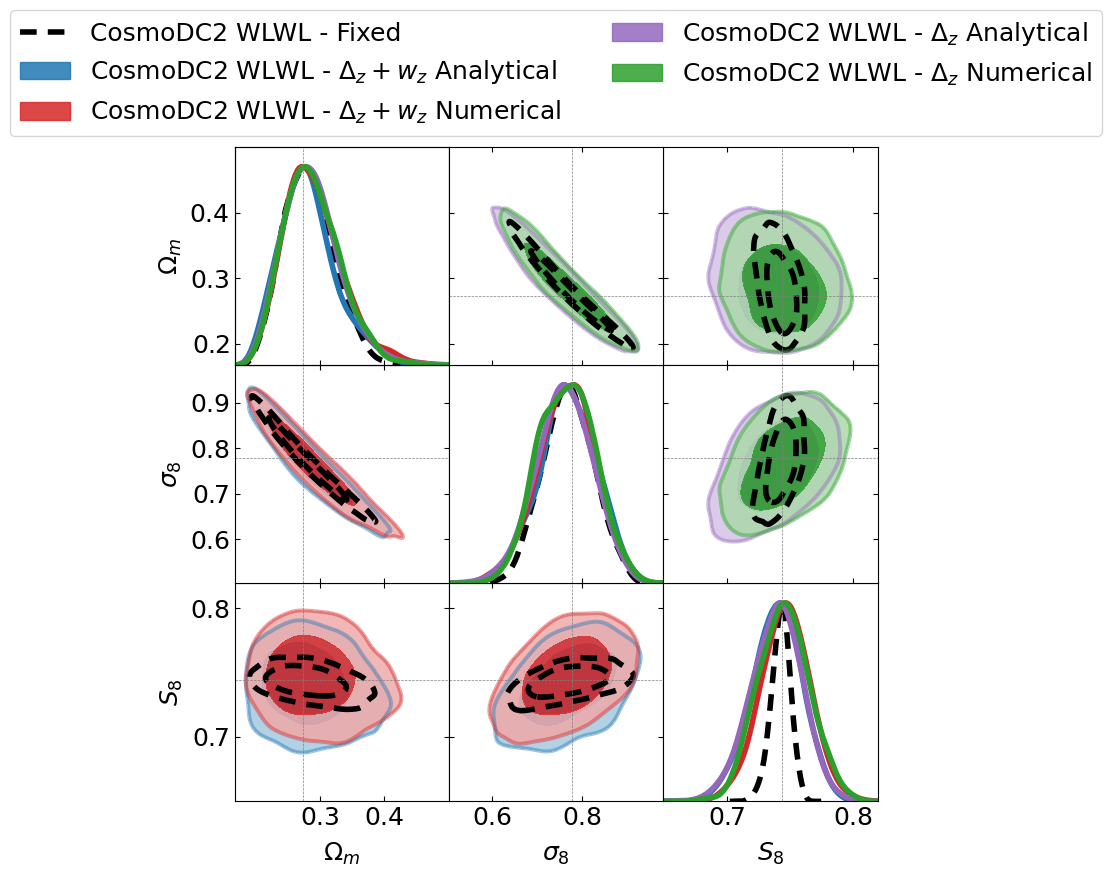

In [31]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([samples_wlwl_nomarg,
                 samples_wlwl_wzdz_ana,
                 samples_wlwl_wzdz_num],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_wlwl_nomarg,
                                samples_wlwl_dz_ana,
                                samples_wlwl_dz_num
                               ],
                 upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/wzdz_wlwl.pdf")

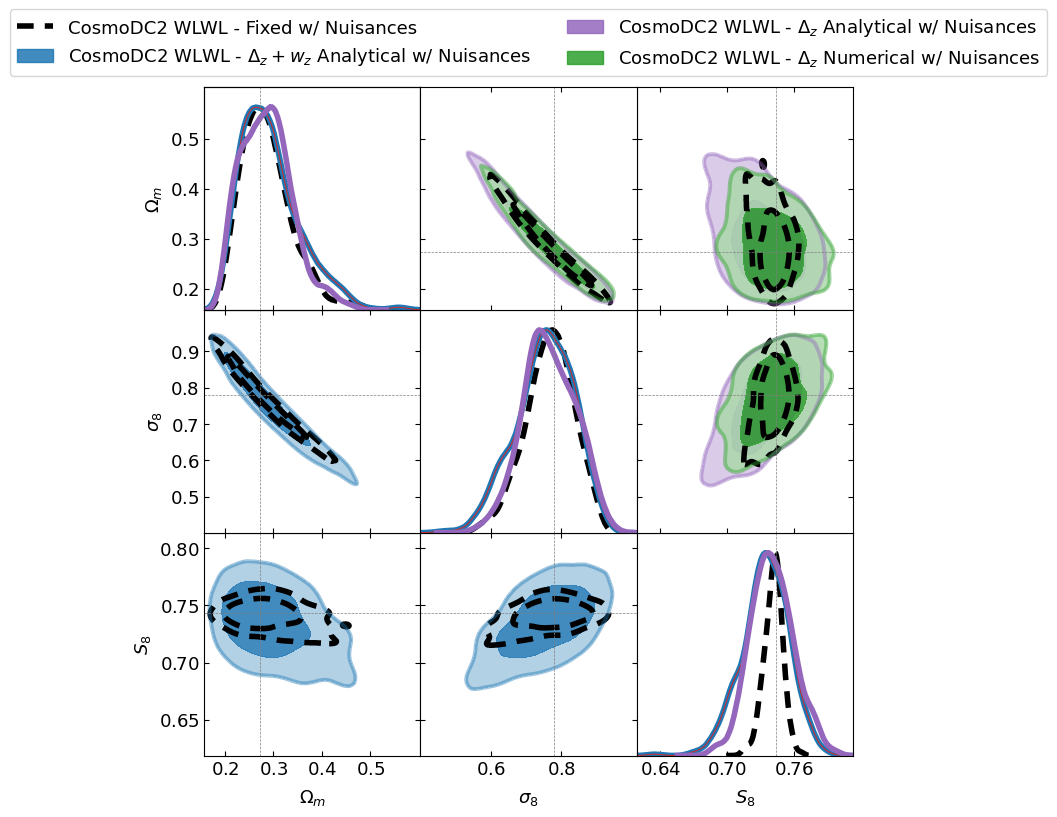

In [32]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_wlwl_nuisance_nomarg,
                 samples_wlwl_nuisance_wzdz_ana,
                 #samples_wlwl_wzdz_num,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_wlwl_nuisance_nomarg,
                                samples_wlwl_nuisance_dz_ana,
                                samples_wlwl_nuisance_dz_num
                               ],
                 upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=2,
                 markers=prat_markers)

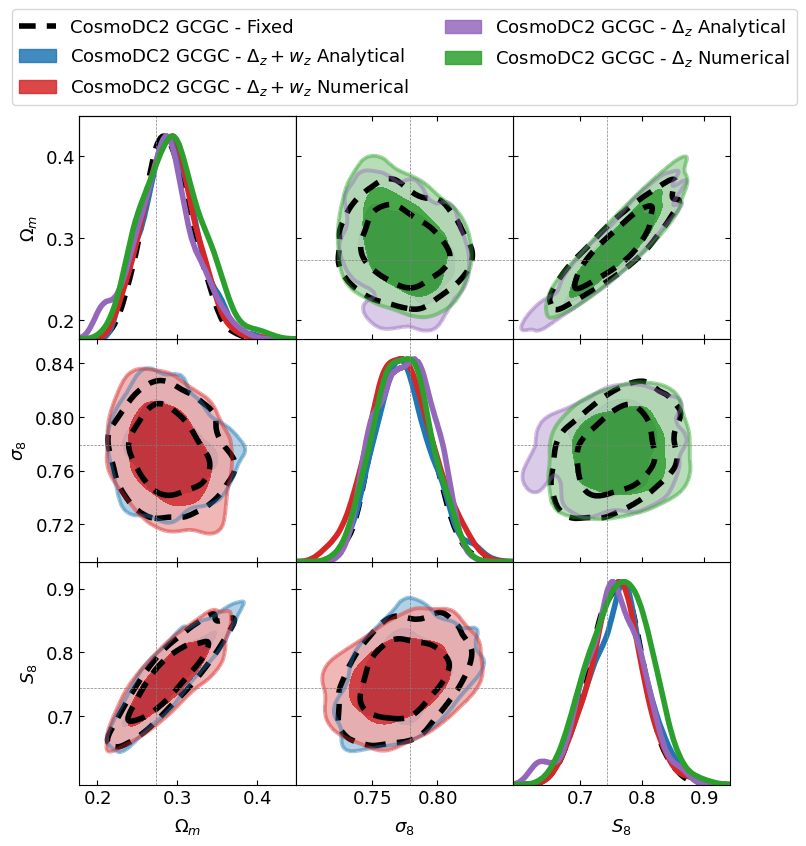

In [33]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_gcgc_nomarg,
                 samples_gcgc_wzdz_ana,
                 samples_gcgc_wzdz_num],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_gcgc_nomarg,
                                samples_gcgc_dz_ana,
                                samples_gcgc_dz_num,
                                 ],
                upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/wzdz_gcgc.pdf")

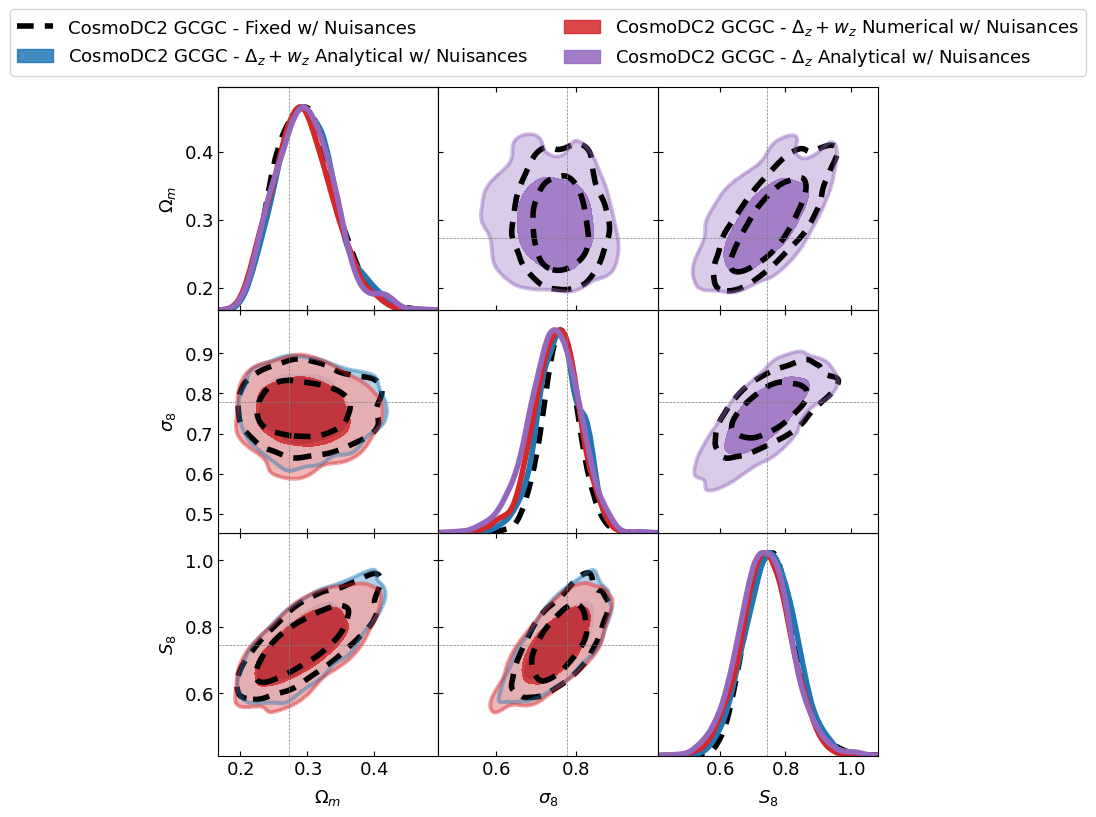

In [34]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_gcgc_nuisance_nomarg,
                 samples_gcgc_nuisance_wzdz_ana,
                 samples_gcgc_nuisance_wzdz_num],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_gcgc_nuisance_nomarg,
                                samples_gcgc_nuisance_dz_ana,
                                #samples_gcgc_nuisance_dz_num,
                                 ],
                upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=2,
                 markers=prat_markers)

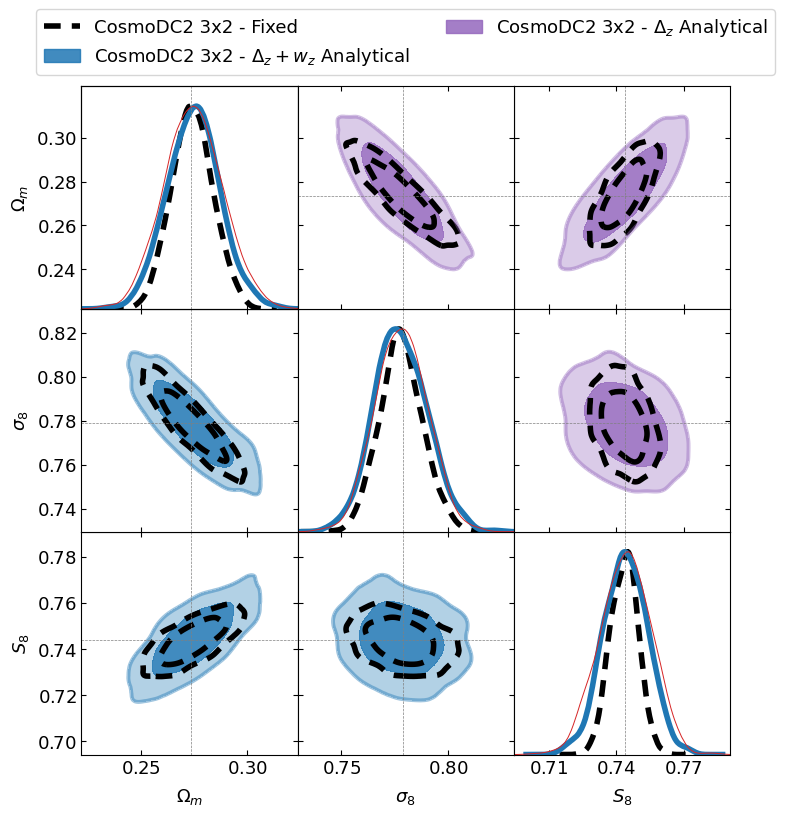

In [35]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_nomarg,
                 samples_3x2_wzdz_ana,
                 #samples_3x2_wzdz_num,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_nomarg,
                                samples_3x2_dz_ana,
                                #samples_3x2_dz_num,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/wzdz_3x2.pdf")

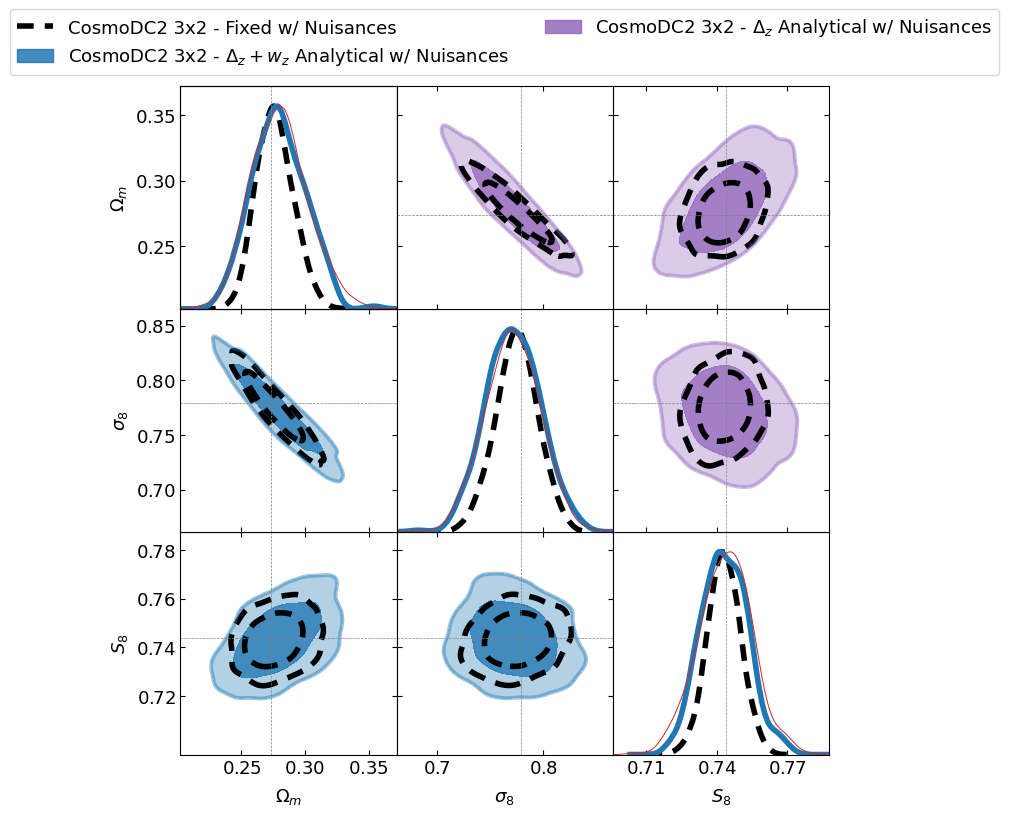

In [36]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 15
g.settings.legend_fontsize = 15
g.settings.axes_labelsize = 15
g.triangle_plot([samples_3x2_nuisance_nomarg,
                 samples_3x2_nuisance_wzdz_ana,
                 #samples_3x2_wzdz_num,
                 ],
                 ['Ωm', 'σ8', 'S8'],
                 upper_roots = [samples_3x2_nuisance_nomarg,
                                samples_3x2_nuisance_dz_ana,
                                #samples_3x2_dz_num,
                                ],
                 upper_kwargs = {'contour_colors':['black', 'C4', 'C2'],
                                'contour_ls': ['--', '-', '-'], 
                                    'filled': [False, True, True],
                                    'contour_lws':4}, 
                line_args=[{'color':'black'},
                           {'color':'C10'},
                           {'color':'C3'}], 
                colors=["black", 'C10', 'C3'],
                filled=[False, True, True],
                contour_ls=['--', '-', '-'], 
                contour_lws=4,
                legend_ncol=2,
                 markers=prat_markers)
g.export("./paper_plots/wzdz_3x2.pdf")

## Shifts and Widths

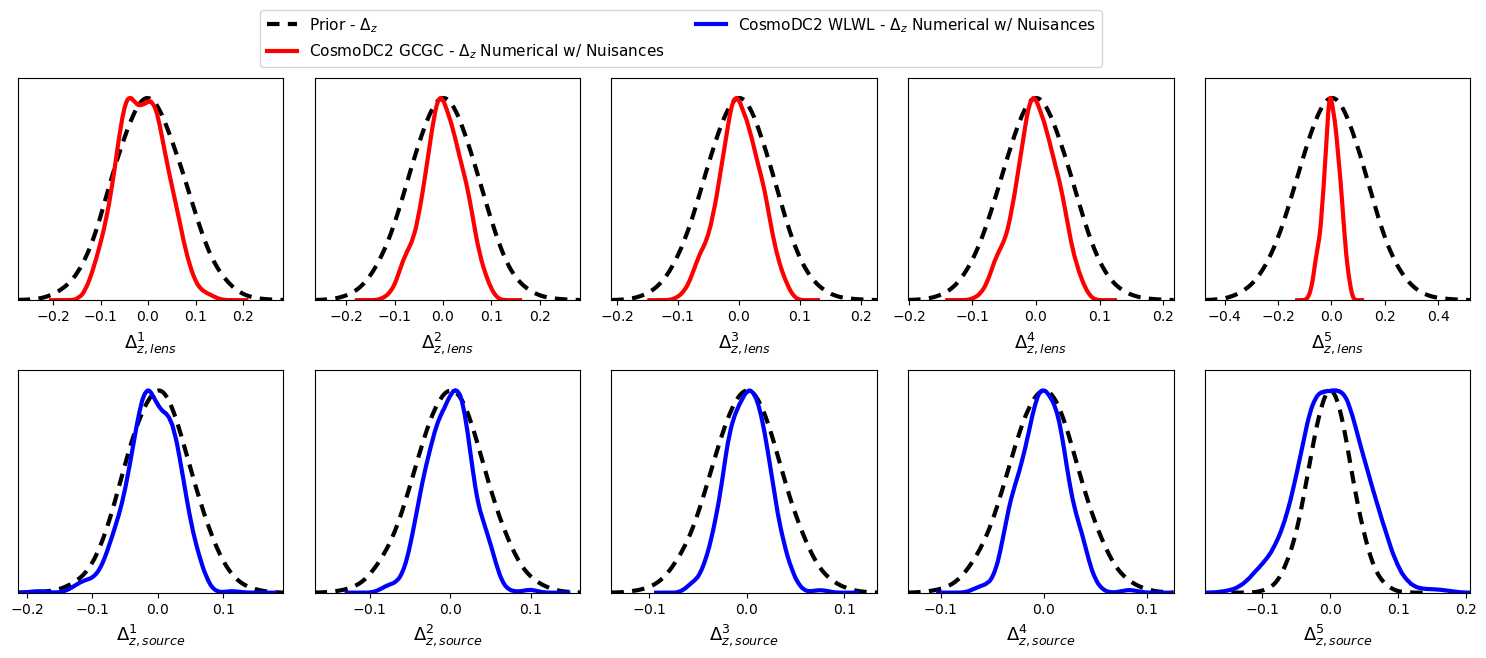

In [37]:
g = plots.get_subplot_plotter(width_inch=15)
g.plots_1d([samples_dz_prior, samples_gcgc_nuisance_dz_num, samples_wlwl_nuisance_dz_num], 
           ['dzs_lens[1]', 'dzs_lens[2]', 'dzs_lens[3]', 'dzs_lens[4]', 'dzs_lens[5]',
            'dzs_source[1]', 'dzs_source[2]', 'dzs_source[3]', 'dzs_source[4]', 'dzs_source[5]'],
            lws=3, ls=['--', '-', '-'], nx=5, legend_ncol=2);

g.export("./paper_plots/dz.pdf")

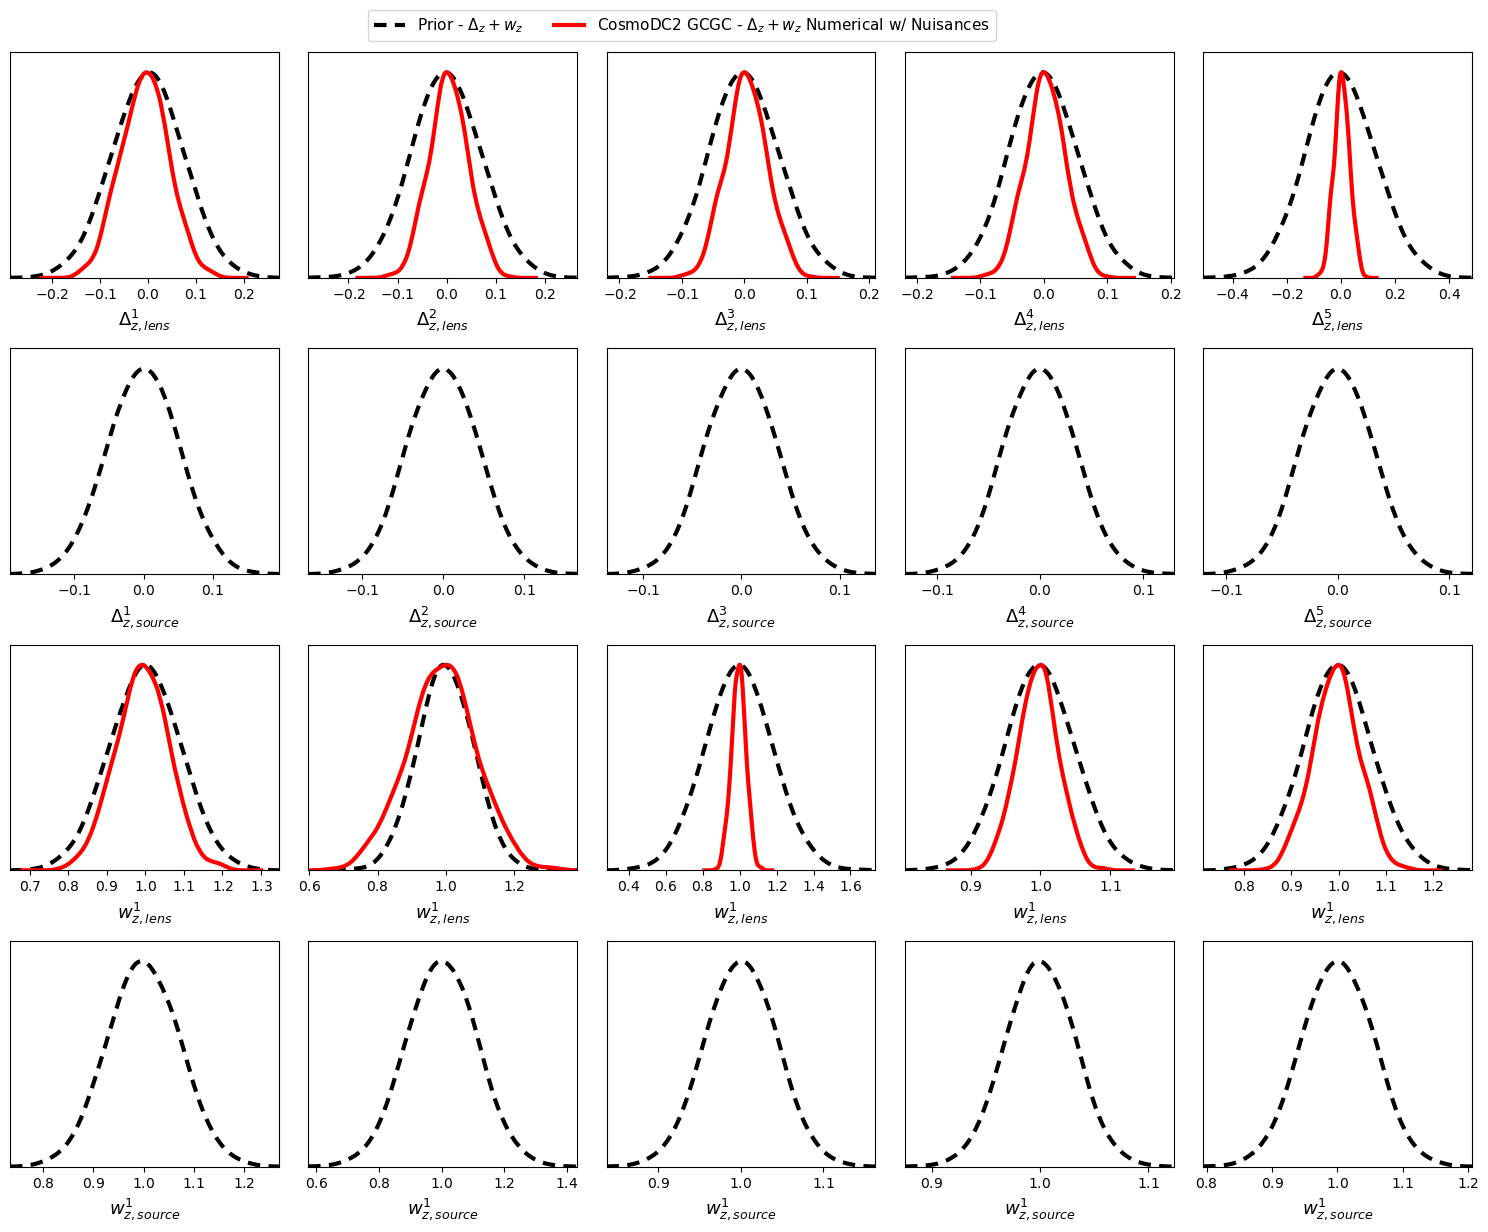

In [40]:
g = plots.get_subplot_plotter(width_inch=15)
g.plots_1d([samples_wzdz_prior, samples_gcgc_nuisance_wzdz_num], #samples_wlwl_nuisance_wzdz_num], 
           ['dzs_lens[1]', 'dzs_lens[2]', 'dzs_lens[3]', 'dzs_lens[4]', 'dzs_lens[5]',
            'dzs_source[1]', 'dzs_source[2]', 'dzs_source[3]', 'dzs_source[4]', 'dzs_source[5]',
            'wzs_lens[1]', 'wzs_lens[2]', 'wzs_lens[3]', 'wzs_lens[4]', 'wzs_lens[5]',
            'wzs_source[1]', 'wzs_source[2]', 'wzs_source[3]', 'wzs_source[4]', 'wzs_source[5]'],
            lws=3, ls=['--', '-', '-'], nx=5, legend_ncol=2);

g.export("./paper_plots/wzdz.pdf")

## Likelihood

In [99]:
lkl_gcgc_nomarg  = np.transpose(np.transpose(np.array(chain_real_nuisance_gcgc_nomarg))[13:154])
lkl_wlwl_nomarg  = np.transpose(np.transpose(np.array(chain_wlwl_nuisance_nomarg))[9:234])
lkl_3x2_nomarg   = np.transpose(np.transpose(np.array(chain_real_nuisance_3x2_nomarg))[14:622])

In [100]:
xi2_wlwl_nomarg = np.array(chain_wlwl_nuisance_nomarg['lp'])
xi2_gcgc_nomarg = np.array(chain_gcgc_nuisance_nomarg['lp'])
xi2_3x2_nomarg  = np.array(chain_3x2_nuisance_nomarg['lp'])

In [101]:
lkl_wlwl_nomarg_m, lkl_wlwl_nomarg_s = np.mean(lkl_wlwl_nomarg, axis=1), np.std(lkl_wlwl_nomarg, axis=1)
lkl_gcgc_nomarg_m, lkl_gcgc_nomarg_s = np.mean(lkl_gcgc_nomarg, axis=1), np.std(lkl_gcgc_nomarg, axis=1)
lkl_3x2_nomarg_m, lkl_3x2_nomarg_s   = np.mean(lkl_3x2_nomarg, axis=1), np.std(lkl_3x2_nomarg, axis=1)

In [102]:
lkl_wlwl_nomarg_cles = [pacc.ClTheoryEnsemble(cle_wlwl, np.array(lkl_wlwl_nomarg[i])) for i in range(len(lkl_wlwl_nomarg))] 
lkl_gcgc_nomarg_cles = [pacc.ClTheoryEnsemble(cle_gcgc, np.array(lkl_gcgc_nomarg[i])) for i in range(len(lkl_gcgc_nomarg))]
lkl_3x2_nomarg_cles  = [pacc.ClTheoryEnsemble(cle_3x2,  np.array(lkl_3x2_nomarg[i]))  for i in range(len(lkl_3x2_nomarg))]

In [103]:
sel_wlwl = np.random.choice(len(lkl_wlwl_nomarg), 100)
sel_gcgc = np.random.choice(len(lkl_gcgc_nomarg), 100)
sel_3x2  = np.random.choice(len(lkl_3x2_nomarg), 100)

In [104]:
lkl_wlwl_nomarg_cles = np.array(lkl_wlwl_nomarg_cles)[sel_wlwl]
lkl_gcgc_nomarg_cles = np.array(lkl_gcgc_nomarg_cles)[sel_gcgc]

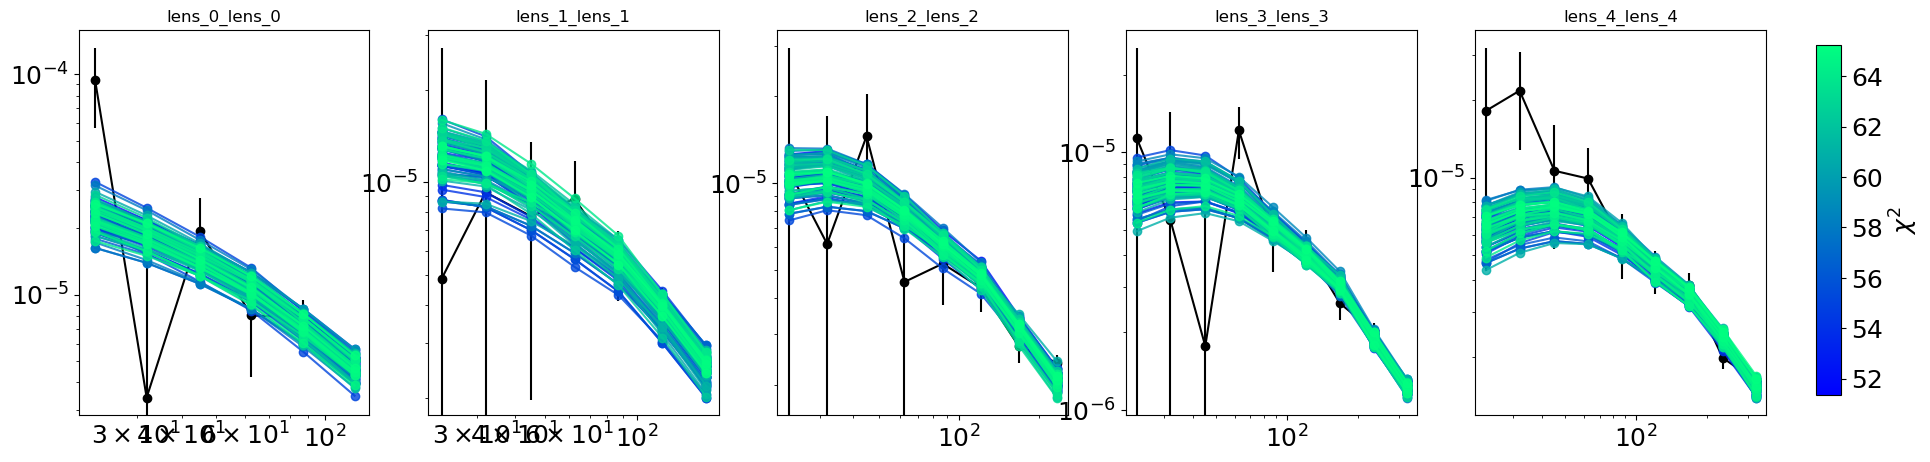

In [105]:
g = pacc.plot_cls([[cle_gcgc], lkl_gcgc_nomarg_cles], cle_gcgc.pairs,
                configs=[
                    {"colors":['black'], "show_legend":False},
                    {"alpha":0.8, "Xi2s":-xi2_gcgc_nomarg[sel_3x2],
                    "show_legend":False, "show_colobar":True}])
g.savefig("./paper_plots/data_gcgc.png", bbox_inches='tight')

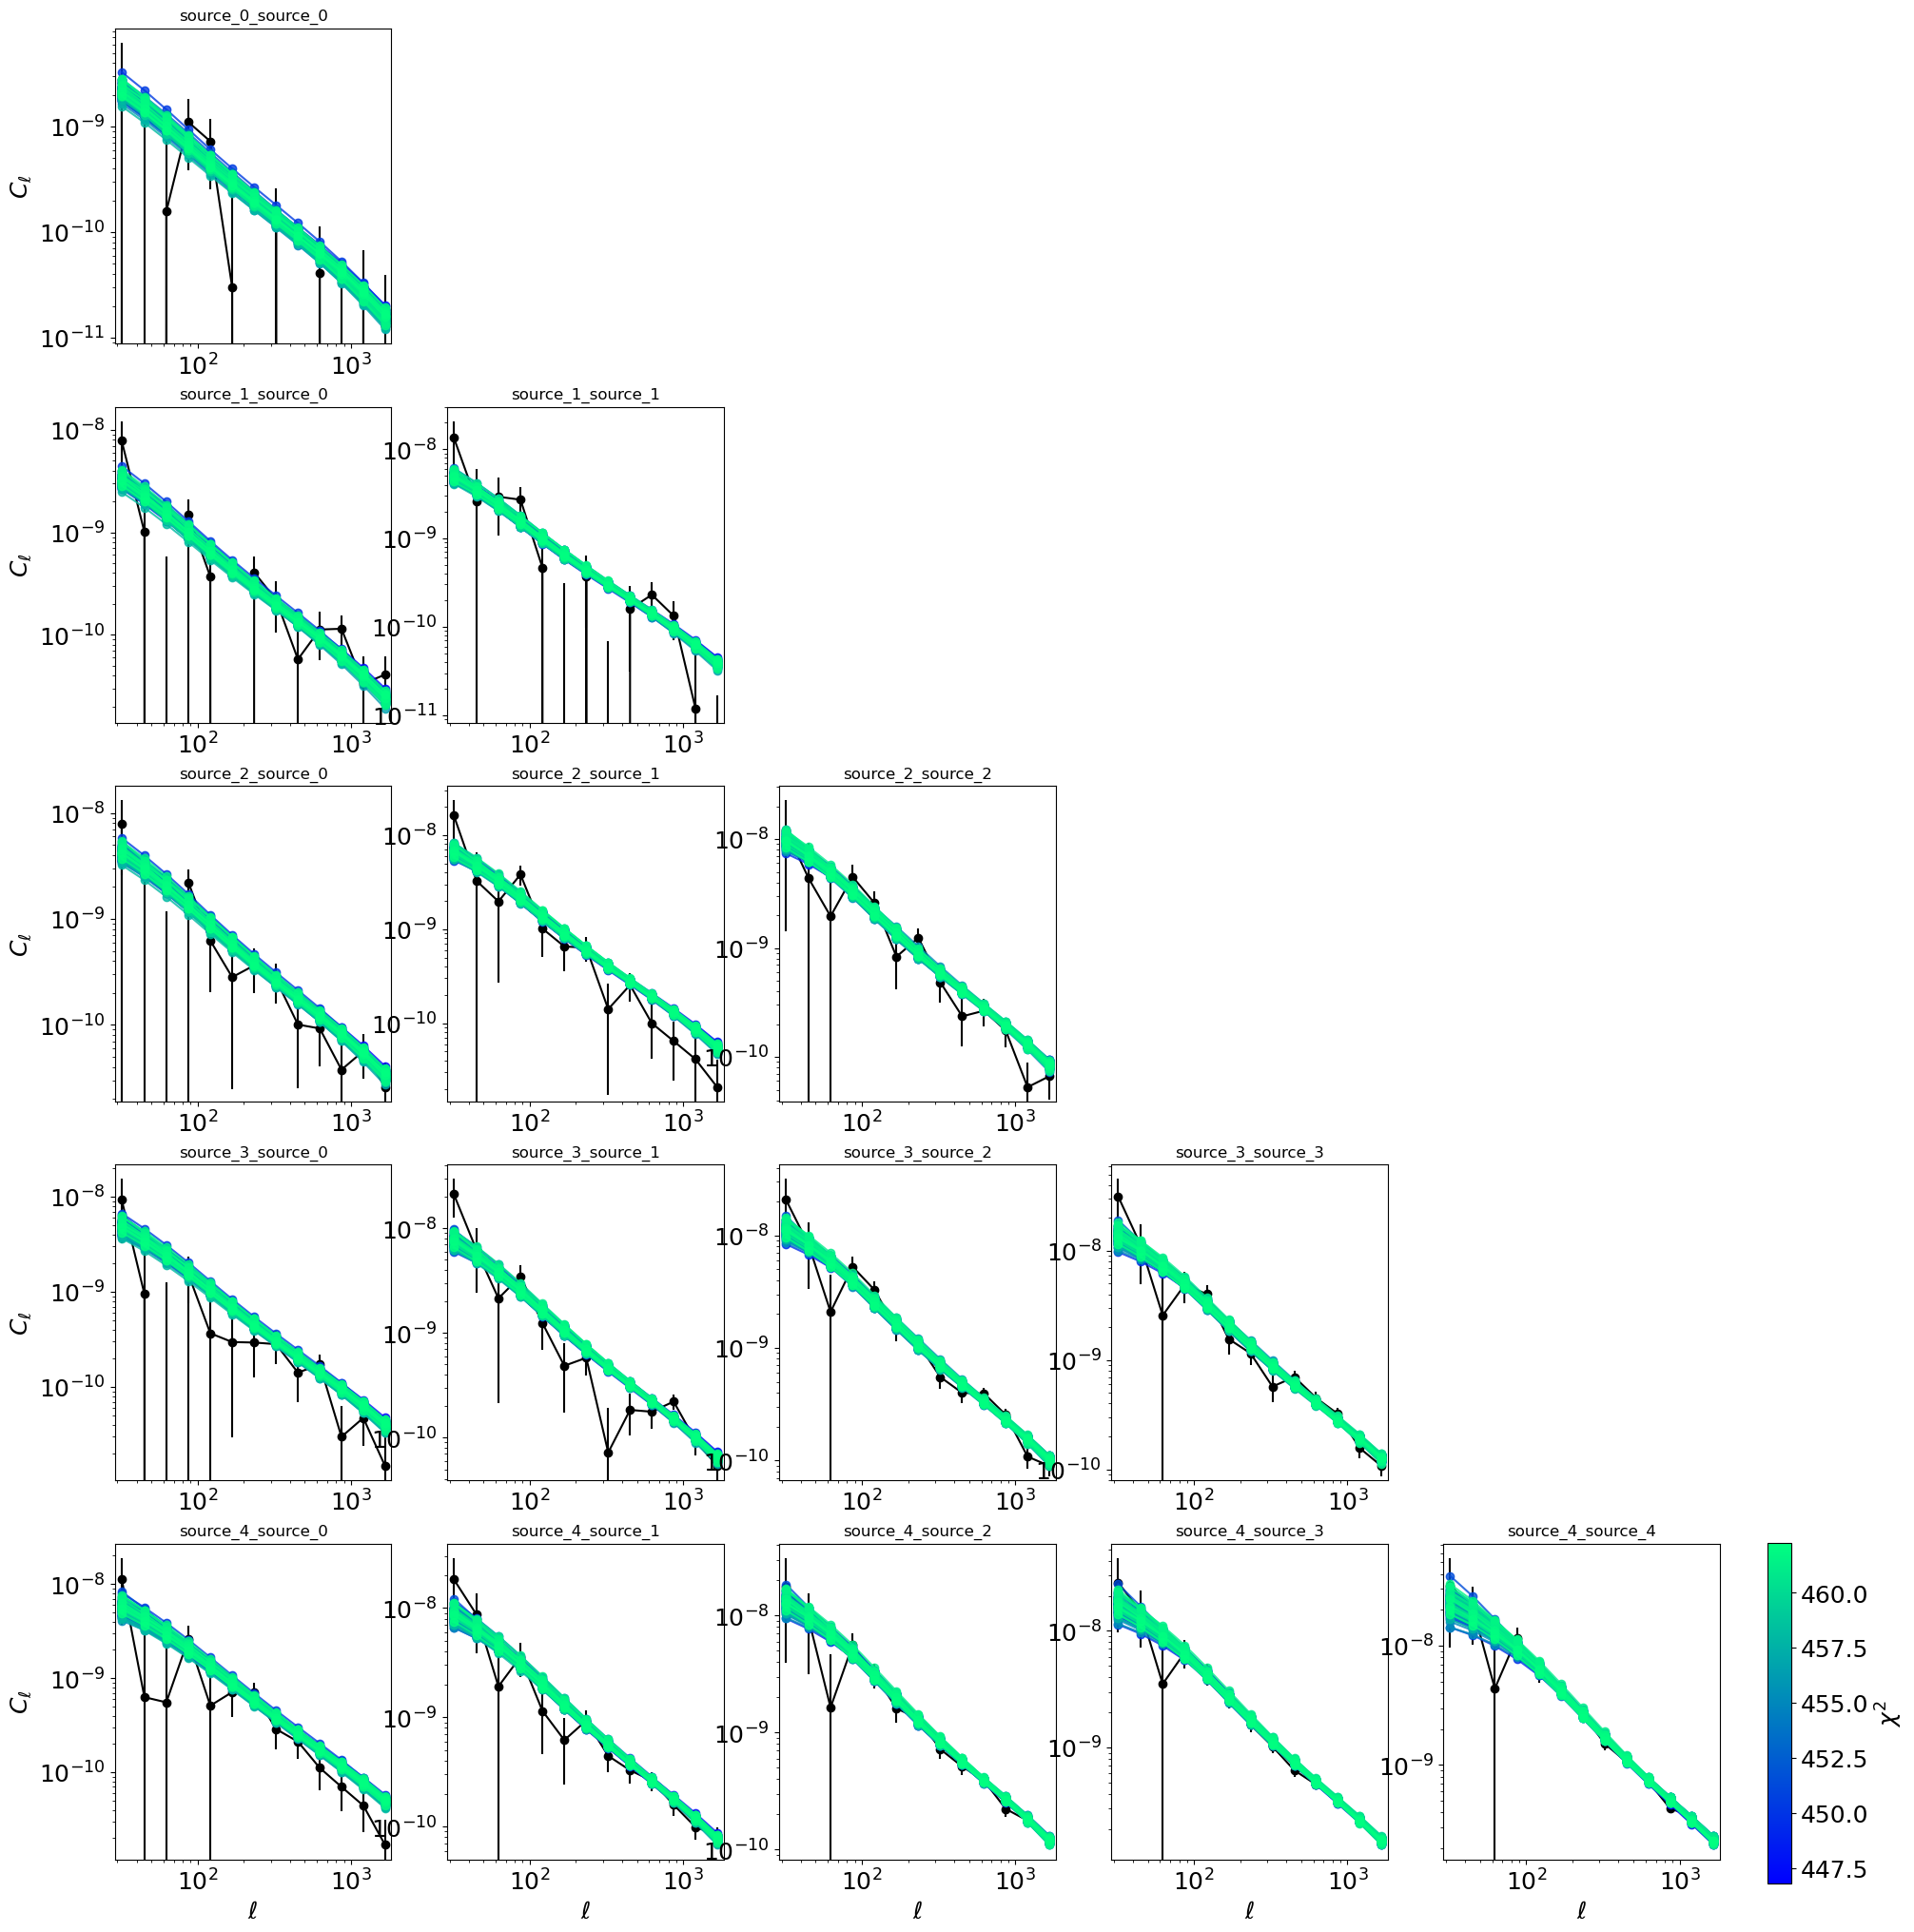

In [106]:
g = pacc.plot_cls([[cle_wlwl], lkl_wlwl_nomarg_cles], cle_wlwl.pairs,
              configs=[
                  {"colors":['black'], "show_legend":False},
                  {"alpha":0.8, "Xi2s":-xi2_3x2_nomarg[sel_3x2],
                "show_legend":False, "show_colobar":True}])
g.savefig("./paper_plots/data_wlwl.png", bbox_inches='tight')

In [107]:
cross_pairs =  [['source_0', 'lens_0'],
 ['source_0', 'lens_1'],
 ['source_0', 'lens_2'],
 ['source_0', 'lens_3'],
 ['source_0', 'lens_4'],
 ['source_1', 'lens_0'],
 ['source_1', 'lens_1'],
 ['source_1', 'lens_2'],
 ['source_1', 'lens_3'],
 ['source_1', 'lens_4'],
 ['source_2', 'lens_0'],
 ['source_2', 'lens_1'],
 ['source_2', 'lens_2'],
 ['source_2', 'lens_3'],
 ['source_2', 'lens_4'],
 ['source_3', 'lens_0'],
 ['source_3', 'lens_1'],
 ['source_3', 'lens_2'],
 ['source_3', 'lens_3'],
 ['source_3', 'lens_4'],
 ['source_4', 'lens_0'],
 ['source_4', 'lens_1'],
 ['source_4', 'lens_2'],
 ['source_4', 'lens_3'],
 ['source_4', 'lens_4']]

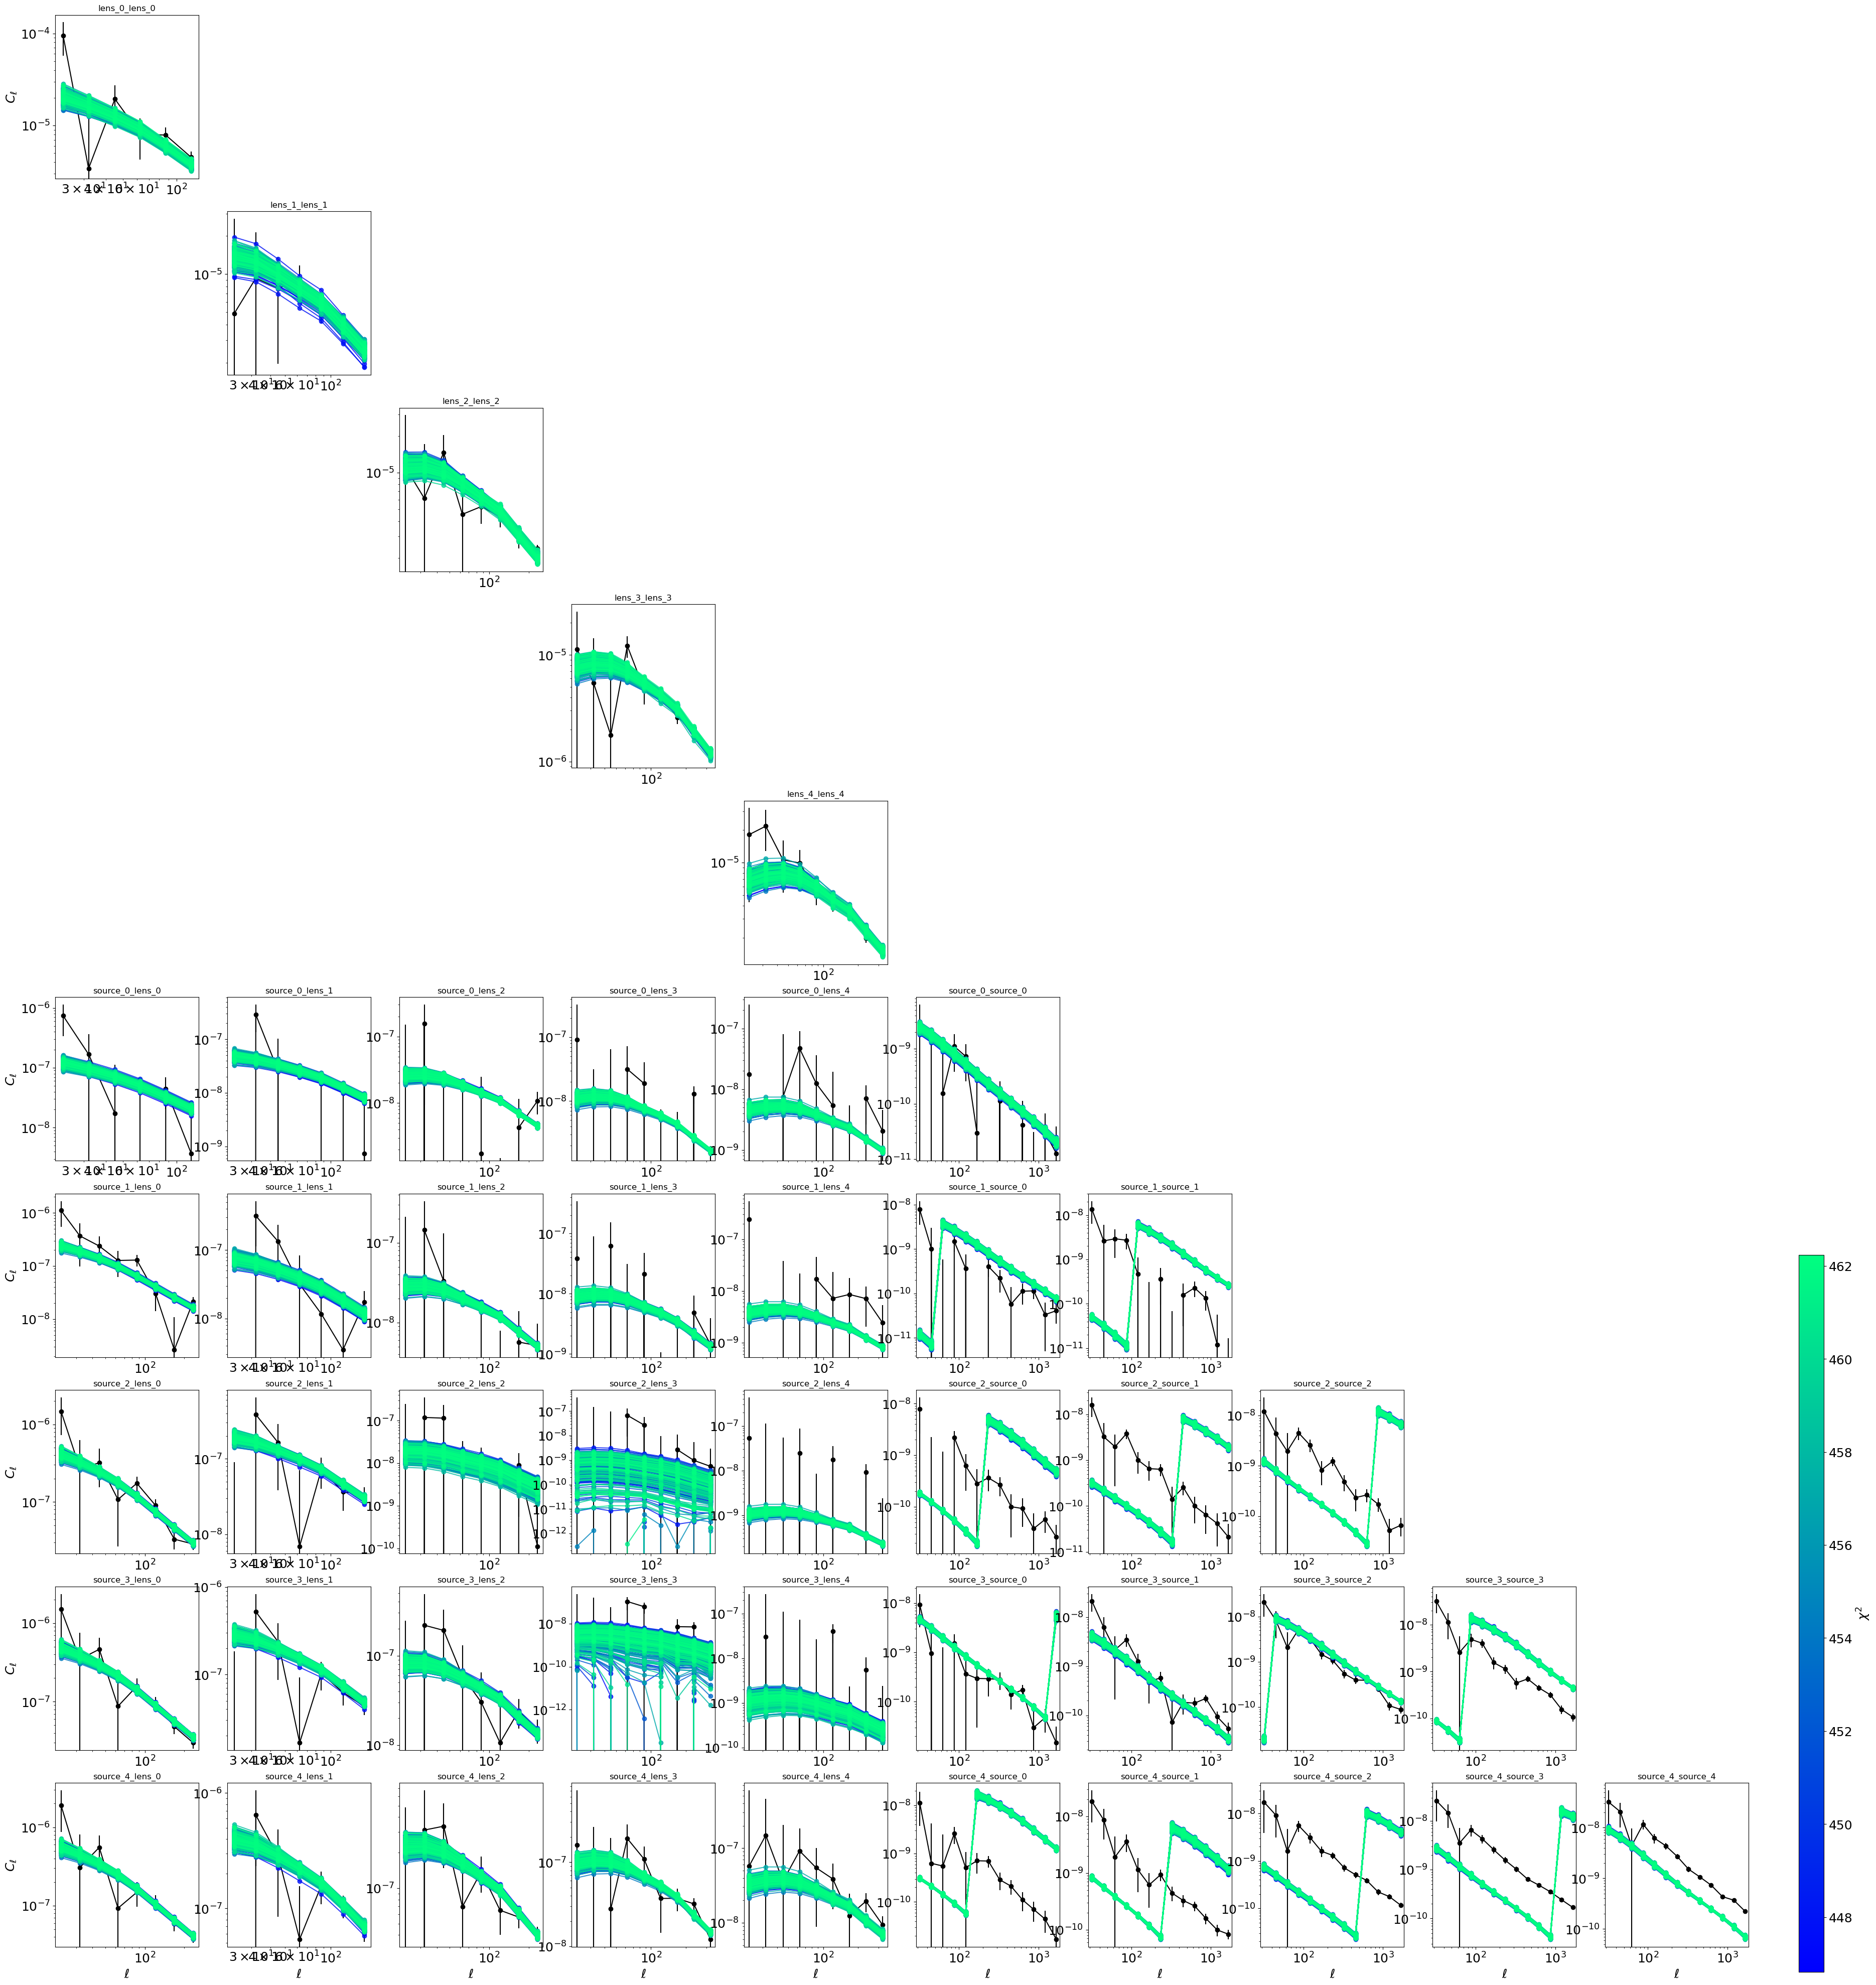

In [109]:
g = pacc.plot_cls([[cle_3x2], lkl_3x2_nomarg_cles], cle_3x2.pairs,
                configs=[
                    {"colors":['black'], "show_legend":False},
                    {"alpha":0.8, "Xi2s":-xi2_3x2_nomarg[sel_3x2],
                    "show_legend":False, "show_colobar":True}])
g.savefig("./paper_plots/data_3x2.png", bbox_inches='tight')